# 1. Sobre este projeto
> **Pessoa autora:** Ricarth Ruan da Silva Lima

> **GitHub**: https://github.com/ricarthlima/ia-tch001

O resultado esperado desse projeto √© a escolha de um modelo para **classifica√ß√£o bin√°ria** para prever diabetes baseado em uma base de dados de indiv√≠duos da tribo ind√≠gena Pima, com base em diversas caracter√≠sticas relacionadas √† sa√∫de.

A base de dados est√° dispon√≠vel no [Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) e j√° foi bastante estudada e testada, dando por exemplo que nos √∫ltimos 30 dias (com base em agosto de 2025) foram mais de meio milh√µes de downloads da base de dados, com mais de 3500 c√≥digos p√∫blicos e 54 t√≥picos de discuss√£o.

Por esta caracter√≠stica, o principal objetivo deste projeto √© **did√°tico**. N√£o existe a pretens√£o de desenvolver o **melhor modelo preditivo**.

Quando falamos de did√°tica, falamos tanto para a minha pr√°tica e aprendizagem pessoal, como para minha avalia√ß√£o como parte da p√≥s-gradua√ß√£o em IA na FIAP, como tamb√©m para que qualquer pessoa que venha a ler este documento consiga aprender e refletir a respeito dos processos b√°sicos de tratamento e explora√ß√£o de dados; pr√©-processamento, treino e avalia√ß√£o do modelo.

Tamb√©m por essa raz√£o, este *notebook* ser√° constru√≠do e disponibilizado em portugu√™s, afinal, materiais em ingl√™s j√° existem em abund√¢ncia. **Entretanto, as vari√°veis e fun√ß√µes ser√£o mantidas em ingl√™s por uma decis√£o de que, como o Python foi escrito em ingl√™s, ter duas l√≠nguas no c√≥digo pode piorar a legibilidade.**

# 2. Sobre a base de dados
> **Base de dados:** https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data

A base de dados Pima Indians Diabetes √© um dos conjuntos de dados mais utilizados em estudos e ensino de machine learning aplicados √† sa√∫de, especialmente para problemas de classifica√ß√£o bin√°ria. Ela foi criada a partir de um estudo conduzido pelo National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) nos Estados Unidos, com o objetivo de prever a ocorr√™ncia de diabetes tipo 2 em mulheres da etnia Pima, que vivem na regi√£o do Arizona. Esse grupo foi escolhido porque apresenta uma das maiores taxas de incid√™ncia de diabetes do mundo, tornando-se relevante para pesquisas m√©dicas e epidemiol√≥gicas. A base cont√©m vari√°veis cl√≠nicas e fisiol√≥gicas, como n√∫mero de gesta√ß√µes, √≠ndice de massa corporal, n√≠veis de glicose, press√£o arterial e hist√≥rico de hereditariedade, permitindo que modelos preditivos sejam testados e comparados. Por sua simplicidade, acessibilidade e equil√≠brio entre dados reais e trat√°veis, ela √© amplamente usada como benchmark em cursos, competi√ß√µes e publica√ß√µes cient√≠ficas, sendo referenciada em reposit√≥rios como o UCI Machine Learning Repository (Dua & Graff, 2019) e no pr√≥prio Kaggle .

## 2.1 Entradas ou "Features"
Em IA e ML, chamamos de uma "feature" (que pode ser traduzida como caracter√≠stica, atributo ou vari√°vel de entrada) a informa√ß√£o mensur√°vel ou observ√°vel usada como entrada para um modelo.

Cada feature representa uma propriedade relevante do fen√¥meno que est√° sendo analisado ‚Äî por exemplo, no caso da base Pima Indians Diabetes, ‚Äún√≠vel de glicose‚Äù e ‚Äú√≠ndice de massa corporal‚Äù s√£o features. A qualidade e a relev√¢ncia dessas caracter√≠sticas influenciam diretamente a capacidade do modelo de identificar padr√µes e fazer previs√µes precisas.

Aqui as entradas de dados captadas segundo a pr√≥pria fonte:

- **Pregnancies**: n√∫mero de gravidezes ao longo da vida;
- **Glucose**: Concentra√ß√£o de glucose no plasma;
- **BloodPressure (mm Hg)**: Press√£o arterial diast√≥lica;
- **SkinThickness  (mm)**: Espessura da prega cut√¢nea do tr√≠ceps;
- **Insulin - 2-Hour serum insulin (mu U/ml)**: quantidade de insulina no sangue duas horas ap√≥s uma ingest√£o de glicose;
- **BMI**: √çndice de Massa Corporal (IMC);
- **DiabetesPedigreeFunction**: medida estat√≠stica que estima a influ√™ncia gen√©tica do hist√≥rico familiar de diabetes;
- **Age**: Idade;

## 2.2 Sa√≠da
H√° uma coluna `Outcome` na base de dados, ela tem valores bin√°rios variando entre 0 e 1, onde 0 indica a aus√™ncia de diabetes, e 1 indica a presen√ßa de diabete.

Ser√° esse resultado que tentaremos criar um modelo para prever.

# 3. Importa√ß√µes iniciais
Aqui faremos as importa√ß√µes que ser√£o √∫teis para todo a *pipeline*. Importa√ß√µes s√£o importante pois existem **diversas** bibliotecas com c√≥digo amplamente testado que resolvem diversos problemas. √â uma excelente pr√°tica n√£o reinventar a roda.

Vale dizer que o termo *pipeline* √© extremamente usado nessa √°rea e pode ser traduzido como "fluxo de processamento" ou, de forma mais did√°tica, como "linha de montagem de etapas". Para efeitos de evitar estrangeirismos e jarg√µes chamarei daqui em diante de "fluxo" ou "fluxo de processamento".

Vale dizer tamb√©m que, diferente de outros tipos de c√≥digos, √© comum em *notebooks* como esse, importarmos bilbiotecas e classes quando formos us√°-las, por isso voc√™ ver√° outras importa√ß√µes ao longo do c√≥digo, em contraponto a simplesmente importar tudo no come√ßo.

In [1]:
# A biblioteca pandas √© usada para carregar, organizar e analisar dados em formato de tabela (linhas e colunas).
import pandas as pd
# O pacote kagglehub permite baixar dados ou modelos diretamente do Kaggle para o notebook, sem precisar acessar o site.
import kagglehub
# Importamos a classe KaggleDatasetAdapter para baixar e acessar datasets p√∫blicos do Kaggle diretamente pelo c√≥digo.
from kagglehub import KaggleDatasetAdapter
# Importa a biblioteca NumPy e a apelida como "np", facilitando o uso de suas fun√ß√µes para c√°lculos num√©ricos e manipula√ß√£o de arrays.
import numpy as np

# 3. Baixando o conjunto de dados
Existem diversas formas de ler o *dataset*, sendo a mais comum apenas baix√°-lo e l√™-lo usando usando o `pandas` com a fun√ß√£o `read_csv`.

Por√©m, vamos fazer diferente, lendo direto do Kaggle usando sua biblioteca. Existem algumas vantagens em fazer isso, dentre elas:

- **Reprodutibilidade autom√°tica:** quem quiser testar este *notebook*, basta baix√°-lo em um ambiente correto (com Python, Pandas e Kagglehub instalados), ou simplesmente abri-lo no Google Collab. Os dados ser√£o baixados automaticamente sem precisar fazer download manual.
- **Evitar o uso do navegador:** voc√™ n√£o precisa sair do ambiente de c√≥digo para obter os dados, como com downloads ou montagem de drive.
- **Boa pr√°tica para projetos colaborativos:** ideal quando o notebook ser√° executado em plataformas como Google Colab ou JupyterHub.
- **Menor risco de erro com caminhos de arquivo:** o arquivo vai sempre para uma pasta controlada (~/.kagglehub), evitando confus√£o com diferentes diret√≥rios.

In [2]:
# Usamos o load_dataset para, vem comigo... ler o conjunto de dados
# "df" √© uma conven√ß√£o bem usada no pandas, vem de "dataframe", √© a vari√°vel onde nossos dados estar√£o
# O primeiro par√¢metro define que ele ser√° adaptado para PANDAS
# O segundo leva o endere√ßo do conjunto de dados, com o nome da pessoa autora e o nome do conjunto
# O terceiro √© o arquivo do conjunto que usaremos, nesse caso, o √∫nico dispon√≠vel
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/pima-indians-diabetes-database",
  "diabetes.csv",
)

/tmp/ipython-input-4023863673.py:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


# 4. Explora√ß√£o dos dados
Agora vamos come√ßar!

Este √© um excelente primeiro passo antes de qualquer outra atividade: conhecer os nossos dados.

Precisamos entender com que dados estamos lidando antes de qualquer coisa. Sem essa etapa, erros ser√£o deixados passar e isso influenciar√° l√° no resultado final.

Ent√£o, vamos: **identificar problemas**, **entender padr√µes**, **pensar em algumas decis√µes futuras**.

## 4.1 Verifica√ß√µes simples

Para isso come√ßaremos com simples comandos do pr√≥prio pandas, e depois avan√ßaremos para visualiza√ß√µes.

In [3]:
# Antes de qualquer coisa: quantas linhas e quantas colunas temos? (linhas, colunas)
df.shape

(768, 9)

In [4]:
# Exibe as primeiras linhas do conjunto de dados para termos uma ideia de como ele est√° estruturado.
# Normalmente s√£o as 5 primeira linhas, mas passando 10 por par√¢metro, o `.head` mostra 10
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [5]:
# Mostra um resumo do conjunto de dados, incluindo o tipo de cada coluna e se h√° valores ausentes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Total de entradas:**
O conjunto de dados possui 768 amostras (linhas), ou seja, registros de 768 pacientes.

**N√∫mero de colunas:**
Existem 9 colunas (vari√°veis) no total, incluindo a vari√°vel-alvo (`Outcome`). Essa `Outcome` j√° √© bin√°ria, mesmo que num√©rica ela varia entre 0 e 1, e pela l√≥gica apresentada, ser√° ela que tentaremos prever, o que j√° facilita bastante as coisas.

**Aus√™ncia de valores nulos:**
Todas as colunas t√™m exatamente 768 valores n√£o nulos, o que indica que n√£o h√° valores ausentes detectados diretamente pelo Pandas. Apesar disso, usando o `df.head()` j√° vimos alguns zeros que n√£o parecem fazer sentidos e provavelmente teremos que tratar mais para frente.

**Tipos de dados:**
- A maioria das colunas s√£o inteiros (int64), o que √© comum em vari√°veis como n√∫mero de gesta√ß√µes, idade, glicose, etc.
- Apenas duas colunas t√™m valores decimais (float64): BMI e DiabetesPedigreeFunction.

In [6]:
# O `.describe()` gera estat√≠sticas como m√©dia, m√≠nimo, m√°ximo e quartis para ajudar a entender a distribui√ß√£o dos dados em cada coluna num√©rica.
# Com o `round(2)`, arredondamos as estat√≠sticas descritivas para 2 casas decimais para facilitar a leitura.
df.describe().round(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
count       768.00   768.00         768.00         768.00   768.00  768.00   
mean          3.85   120.89          69.11          20.54    79.80   31.99   
std           3.37    31.97          19.36          15.95   115.24    7.88   
min           0.00     0.00           0.00           0.00     0.00    0.00   
25%           1.00    99.00          62.00           0.00     0.00   27.30   
50%           3.00   117.00          72.00          23.00    30.50   32.00   
75%           6.00   140.25          80.00          32.00   127.25   36.60   
max          17.00   199.00         122.00          99.00   846.00   67.10   

       DiabetesPedigreeFunction     Age  Outcome  
count                    768.00  768.00   768.00  
mean                       0.47   33.24     0.35  
std                        0.33   11.76     0.48  
min                        0.08   21.00     0.00  
25%                        0.24   24.00     0.00  
50%                        0.37   29.00     0.00  
75%                        0.63   41.00     1.00  
max                        2.42   81.00     1.00

Um tanto de n√∫meros pode n√£o dizer nada para olhos n√£o treinados no `.describe()`, mas muita informa√ß√£o √∫til pode ser tirada daqui. Dentre as que eu consegui notar:

### **Gravidezes (`Pregnancies`)**
- N√∫mero de gesta√ß√µes: varia de 0 a 17, com m√©dia 3.8     
- Valores razo√°veis. N√£o h√° zeros suspeitos, mas adimito que 17 gesta√ß√µes √© um n√∫mero que para minha viv√™ncia √© bem alto. Isso n√£o necessariamente indica um *outlier*\* de primeira, dado que √© clinicamente poss√≠vel e pode variar com a cultura, mas por ser um valor mais que dobra do 75%, vale ficar com isso em mente.

### **N√≠vel de glicose no sangue (`Glucose`)**
- M√©dia 120.8, vai de 0 a 199
- Possui zeros, n√£o faz sentido a pessoa ter zero de glicose no sangue, precisaremos tratar isso mais para frente.

### **Press√£o arterial (`BloodPressure`)**
- M√©dia 69.1, varia de 0 a 122
- Mais uma vez, zero √© fisicamente imposs√≠vel, provavelmente um valor ausente a ser tratado

### **Espessura da pele (`SkinThickness`)**
- M√©dia 20.5, varia de 0 a 99
- Mais uma vez, zeros que indicam aus√™ncia de registro, pois √© improv√°vel clinicamente

### **N√≠vel de Insulina (`Insulin`)**
- M√©dia 79.8, vai de 0 a 846
- Seguimos com o problema dos zeros, e parece ter muitos, gra√ßas aos 25%.

### **IMC, Indice de Massa Corporal (`BMI`)**
- M√©dia 31.9, de 0 a 67.1
- Zero n√£o faz sentido fisiol√≥gico, precisa ser tratado

### **Probabilidade gen√©tica de diabetes (`DiabetesPedigreeFunction`)**
- Essa √© a coluna mais complexa pois est√° relacionada com especificidades da pesquisa. Em uma pesquisa, noto que trata-se de uma medida estat√≠stica que estima a influ√™ncia gen√©tica do hist√≥rico familiar de diabetes. Ela n√£o representa um parente espec√≠fico, mas sim uma combina√ß√£o matem√°tica do grau de parentesco com pessoas diab√©ticas e sua frequ√™ncia na fam√≠lia.¬π
- Nos limites do nosso conhecimento, nenhum valor nulo ou estranho aparente.

### **Idade (`Age`)**
- M√©dia 33.2, varia de 21 a 81
- Valores perfeitamente normais, sem problemas evidentes ‚ú®

### **Resultado (`Outcome`)**
- 0 = N√£o diab√©tico, 1 = Diab√©tico
- Nosso resultado bin√°rio que tentaremos prever
- Propor√ß√£o: ~35% com diabetes

### **Conclus√µes**
Agora temos uma √≥tima vis√£o do dados que estamos lidando e principalmente com a certeza que, apesar de n√£o ter nenhum nulo, nenhum dado abertamente faltante, h√° v√°rios zeros que indicam a aus√™ncia de informa√ß√£o

* *Outliers* s√£o valores que fogem muito do padr√£o geral dos dados. Em portugu√™s, podemos chamar de "valores discrepantes", valores extremos ou at√© pontos fora da curva. Eles podem ser causados por v√°rias coisas como: erros de digita√ß√£o, casos raros e muito excepcionais (com 17 gesta√ß√µes), erros de tratamento, erros de captura de dados, ou mesmo comportamentos interessantes de investigar.

## 4.2 Dados zerados
J√° que notamos que dados zerados ser√£o um problema, pois a pesquisa preencheu dados faltantes com zeros, vamos olhar isso mais a fundo para entender a dimens√£o da dor de cabe√ßa que teremos mais para frente.

In [7]:
# Cria um DataFrame com contagem e porcentagem de zeros por coluna
# Usamos .drop(columns=["Outcome"]) para n√£o pegar a √∫ltima coluna, `Outcome` que tem zeros por ser bin√°ria
def zeros_per_column(dataframe):
    df_zeros = pd.DataFrame({
        'Quantidade de zeros': (dataframe.iloc[:, :8] == 0).sum(),
        'Porcentagem (%)': ((dataframe.iloc[:, :8] == 0).sum() / dataframe.shape[0] * 100).round(2)
    })
    df_zeros = df_zeros.sort_values(by='Porcentagem (%)', ascending=False)
    return df_zeros

zeros_per_column(df)

Quantidade de zeros  Porcentagem (%)
Insulin                                   374            48.70
SkinThickness                             227            29.56
Pregnancies                               111            14.45
BloodPressure                              35             4.56
BMI                                        11             1.43
Glucose                                     5             0.65
DiabetesPedigreeFunction                    0             0.00
Age                                         0             0.00

Na tabela a seguir, podemos condensar algumas das nossas conclus√µes sobre os zeros:

| Coluna            | % de zeros | Interpreta√ß√£o                                                                                                                               |
| ----------------- | ---------- | ------------------ |
| **Insulin**       | **48,70%** | Quase **metade dos registros** est√£o zerados. Isso indica forte aus√™ncia de dados. |
| **SkinThickness** | **29,56%** | Tamb√©m tem muitos dados faltando.|
| **Pregnancies**   | 14,45%     | Zero pode ser um valor **real**, pois devem representar pessoas que nunca engravidaram.                         |
| **BloodPressure** | 4,56%      | Clinicamente, press√£o 0 n√£o faz sentido.                                                                     |
| **BMI**           | 1,43%      | Pequena quantidade, mas zero em √≠ndice de massa corporal n√£o √© v√°lido.                                                          |
| **Glucose**       | 0,65%      | Poucos zeros, mas glicose 0 √© **imposs√≠vel**.                                                                               |


## 4.3 Dados duplicados
E j√° que estamos procurando poss√≠veis problemas, √© sempre bom procurar por dados duplicados para poder delet√°-los.

In [8]:
df.duplicated().sum()

np.int64(0)

Sem dados duplicados.

## 4.4 Visualiza√ß√£o dos dados
Algumas conclus√µes foram tiradas apenas analisando os n√∫meros com as fun√ß√µes do pandas, por√©m muitas vezes algumas novas percep√ß√µes aparecem ao analisarmos visualmente os dados.

### 4.4.1 Matriz de dispers√£o  

Existem **diversas** formas de fazer isso, e uma muito interessante √© usando uma matriz de dispers√£o. Trata-se de um gr√°fico que compara duas vari√°veis ao mesmo tempo, colocando uma vari√°vel no eixo X e outra no eixo Y.

Assim, podemos conseguir ver (literalmente) padr√µes, tend√™ncias, correla√ß√µes e *outliers*.

In [9]:
# Importamos a fun√ß√£o scatter_matrix para criar gr√°ficos de dispers√£o entre as vari√°veis e observar poss√≠veis rela√ß√µes entre elas.
from pandas.plotting import scatter_matrix
# Importamos o Matplotlib com o apelido plt, que ser√° usado para exibir e personalizar gr√°ficos no notebook.
import matplotlib.pyplot as plt
# Importamos a biblioteca Seaborn, que facilita a cria√ß√£o de gr√°ficos estat√≠sticos com visual mais limpo e informativo.
import seaborn as sns
# Importa o m√≥dulo math, que fornece fun√ß√µes matem√°ticas prontas como ra√≠zes, pot√™ncias, trigonometria e constantes (por exemplo, pi).
import math


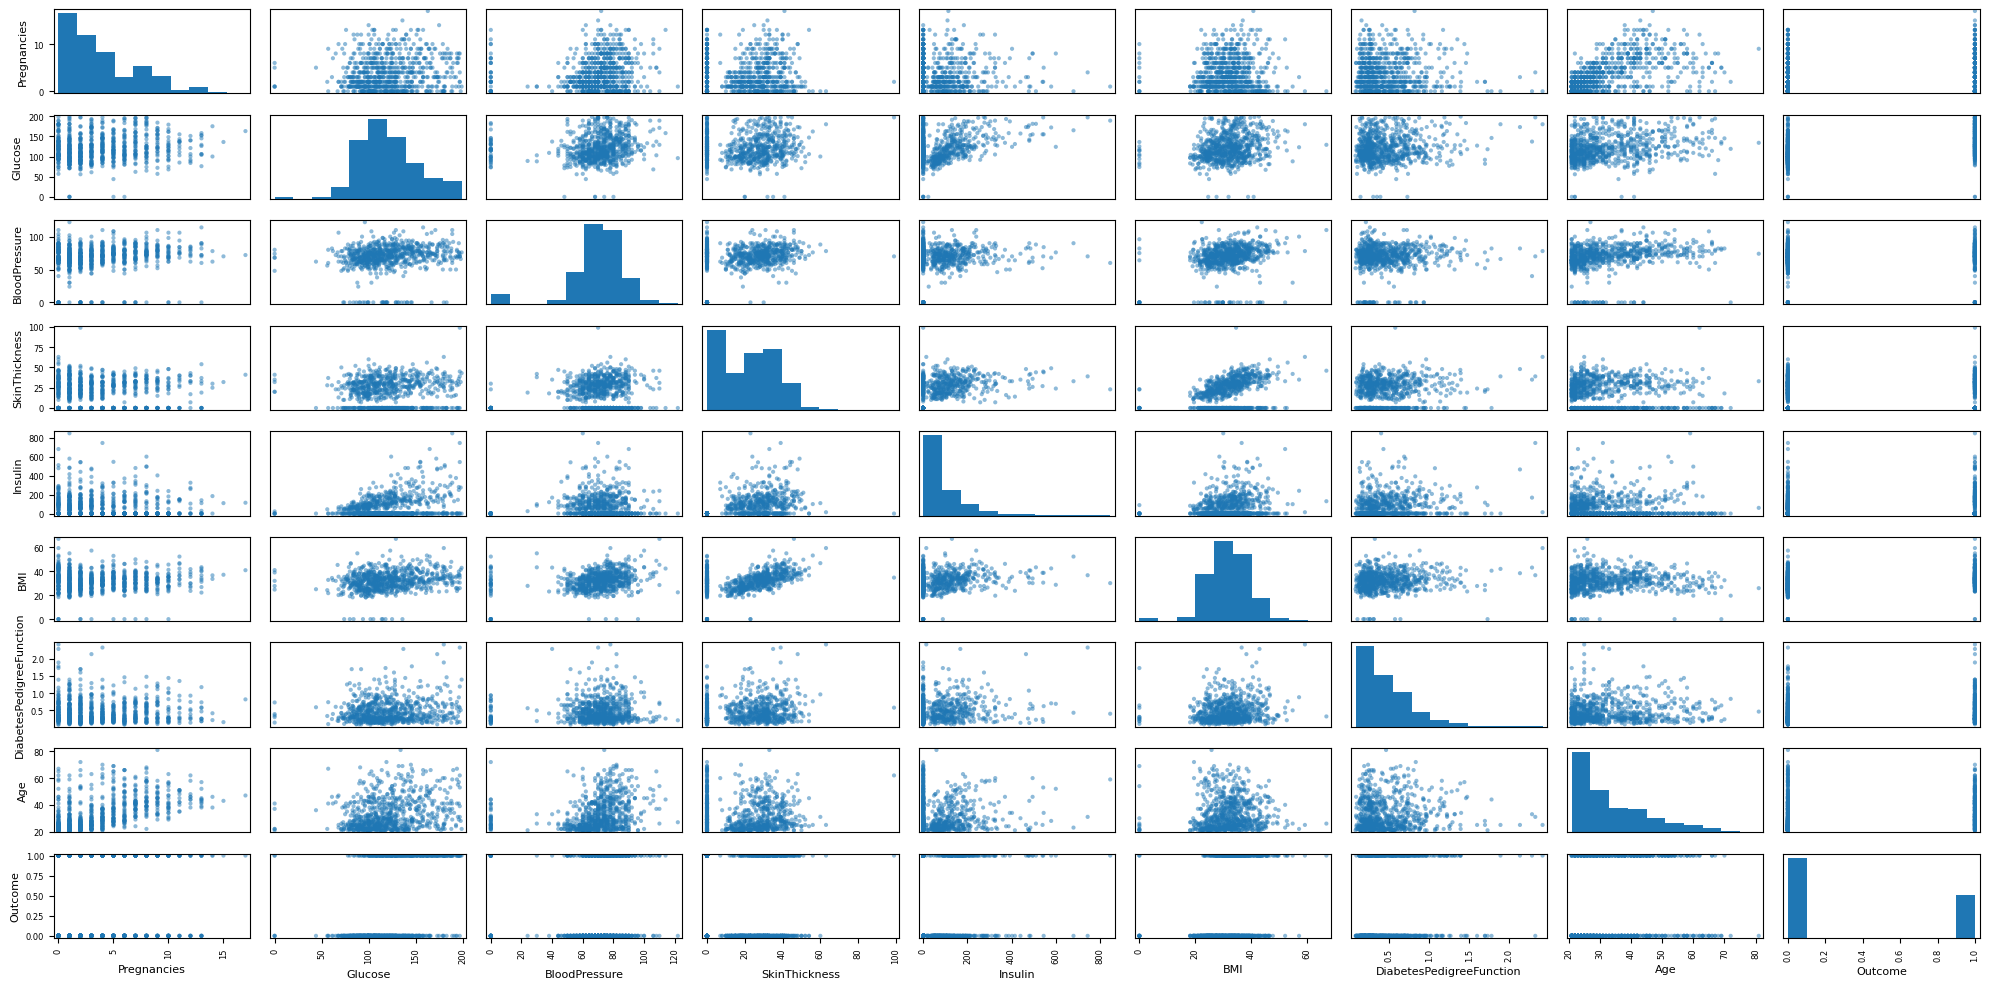

In [10]:
# Aqui criamos uma grade de gr√°ficos que compara todas as vari√°veis entre si.
# Isso ajuda a enxergar rela√ß√µes entre os dados e descobrir vari√°veis que parecem influenciar o diagn√≥stico de diabetes.
scatter = scatter_matrix(df, figsize=(20, 10))

# Tratamentos na visualiza√ß√£o do gr√°fico para facilita, mas opcional
for ax in scatter.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.tick_params(axis='both', labelsize=6)
plt.tight_layout()
plt.show()

#### O que conseguimos observar?

1. Distribui√ß√µes diagonais, mostram como cada vari√°vel est√° distribu√≠da, pois est√£o sendo cruzadas com elas mesmas. Chamamos isso de "histogramas" e s√£o importantes o suficiente para terem gr√°ficos apenas para elas (para melhor visualiza√ß√£o)
  - Vari√°veis como `BMI`, `Age` e `Glucose` t√™m distribui√ß√£o mais parecida com uma curva normal.
  - Vari√°veis como `Insulin`, `SkinThickness` e `DiabetesPedigreeFunction` s√£o mais assim√©tricas (com caudas longas), sugerindo a presen√ßa de valores discrepantes ou dados faltantes mascarados.

2. Analisando cruzamento com Outcome
  - √â interessante notar a diferen√ßa do cruzamento das outras colunas com a `Outcome`.
  - Colunas onde o "desenho" do 0, e o "desenho" do 1 s√£o parecidos, podem indicar uma baixa participa√ß√£o desse "atributo" no resultado final (`Outcome`).
  - J√° colunas com "desenhos" significativamente diferentes entre 0 e 1 podem indicar uma participa√ß√£o maior;
  - Glucose, BMI, DPF e Age **PARECEM**, em um primeiro momento, bons indicativos. Observando o gr√°fico especificamente abaixo pode ficar mais claro:

<Axes: xlabel='Outcome', ylabel='Glucose'>

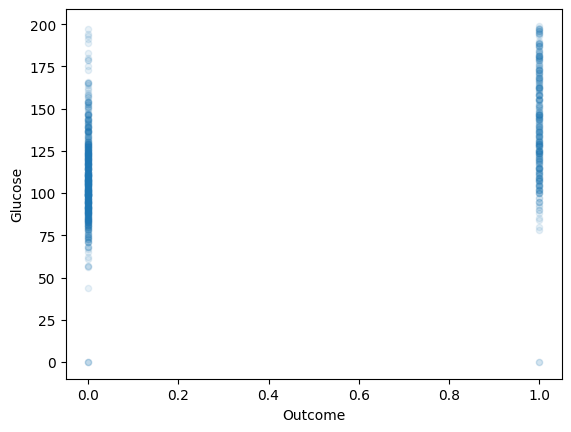

In [11]:
df.plot(kind = "scatter", x = "Outcome",  y = "Glucose", alpha = 0.1)

### 4.4.2 Histogramas
O cruzamento entre uma coluna com ela mesma geram histogramas muito interessantes. Esses s√£o t√£o interessantes que n√≥s podemos gerar alguns gr√°ficos mais detalhados apenas para eles.

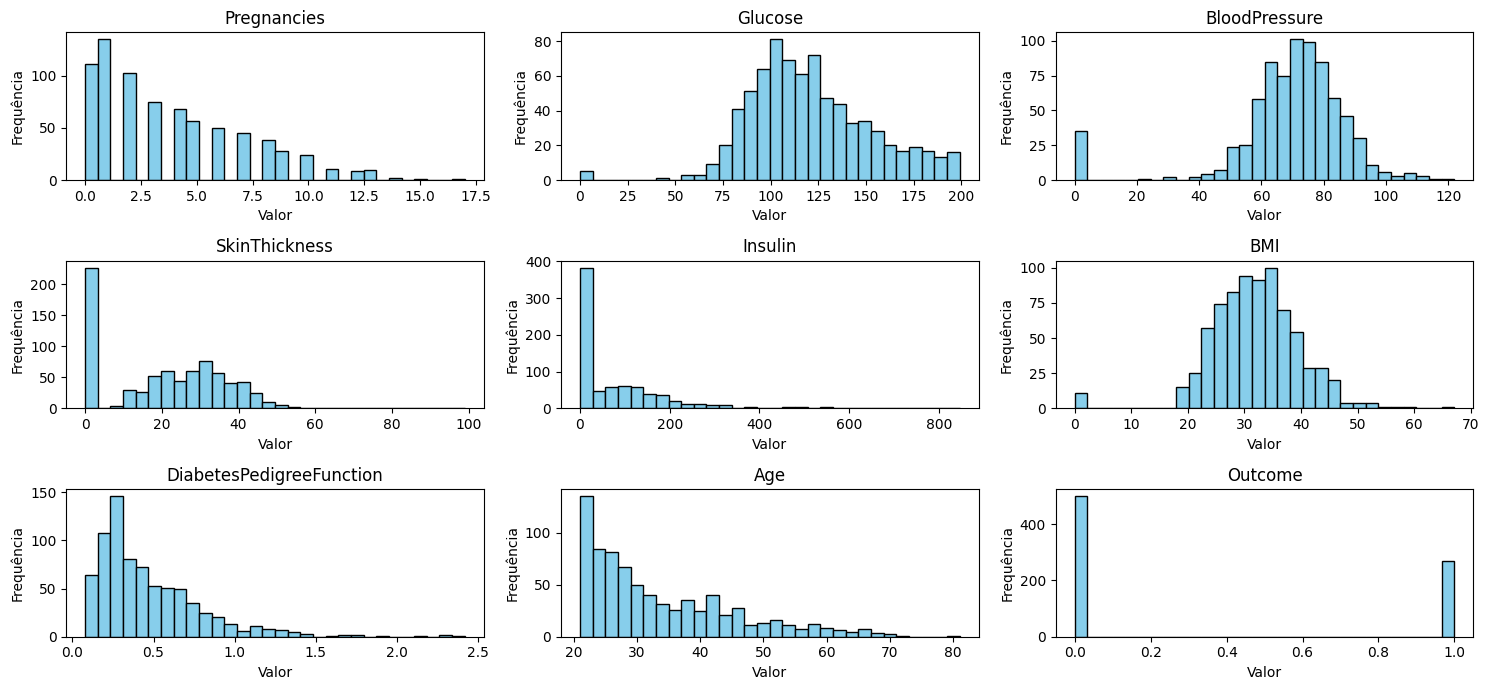

In [12]:
# Visualiza√ß√£o com os histogramas de todas as vari√°veis, focando apenas nas distribui√ß√µes individuais de cada coluna (sem compara√ß√£o entre vari√°veis).
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 7))

for ax, col in zip(axes.flat, df.columns):
    ax.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(col)
    ax.set_ylabel("Frequ√™ncia")
    ax.set_xlabel("Valor")

plt.tight_layout()
plt.show()

#### E agora, o que podemos observar?

1. Zeros suspeitos (prov√°veis dados ausentes ou inv√°lidos)
- `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`: todos t√™m barras altas em 0, o que confirma todo o papo que j√° haviamos tido sobre materiais zerados.

2. Assimetria (distribui√ß√£o n√£o sim√©trica)
- `Pregnancies`, `Insulin`, `DiabetesPedigreeFunction`, `Age`: fortemente assim√©tricas √† direita. Isso n√£o precisa necessariamente ser um indicativo de *outliers*, basicamente pode estar relacionado com a natureza dos dados.
- `SkinThickness`, `BMI`: levemente assim√©tricas √† direita, mas ainda com concentra√ß√£o razo√°vel em valores centrais.
- `Glucose` e `BloodPressure`: distribui√ß√µes mais pr√≥ximas da normalidade, por√©m com alguma leve assimetria.
- `Outcome`: vari√°vel bin√°ria, sem simetria esperada, mostra claramente a propor√ß√£o de casos positivos/negativos (mais negativos).

3. Poss√≠veis outliers
- `Insulin`: cauda muito longa, valores chegando a quase 900, o que √© muito acima da m√©dia esperada.
- `SkinThickness`: registros pr√≥ximos de 100 mm parecem fora do padr√£o.
- `BMI`: valores pr√≥ximos de 0 e acima de 60 s√£o at√≠picos.
- `Age`: alguns registros acima de 70 anos, o que pode ser raro na amostra, mas n√£o √© biologicamente imposs√≠vel.
- `Pregnancies`: casos acima de 12 gesta√ß√µes s√£o raros e podem ser outliers.

### 4.4.3 Procurando por *outliers* com Boxplots
O boxplot √© uma das formas mais usadas para identificar visualmente outliers, porque ele resume a distribui√ß√£o dos dados e destaca valores que est√£o muito fora do padr√£o esperado.

O que ele mostra:

- **Ret√¢ngulo verde (a tal da "caixa"):** representa o intervalo entre o 1¬∫ quartil (Q1, 25% dos dados) e o 3¬∫ quartil (Q3, 75% dos dados). Essa faixa √© chamada de intervalo interquartil (IQR).
- **Linha dentro da caixa:** a mediana (Q2), ou seja, o valor central da distribui√ß√£o.
- **"Bigodes":** se estendem at√© o √∫ltimo valor que n√£o √© considerado outlier.
- **C√≠rculos (pontos fora dos bigodes)**: finalmente, s√£o os *outliers*, valores que est√£o al√©m desses limites.

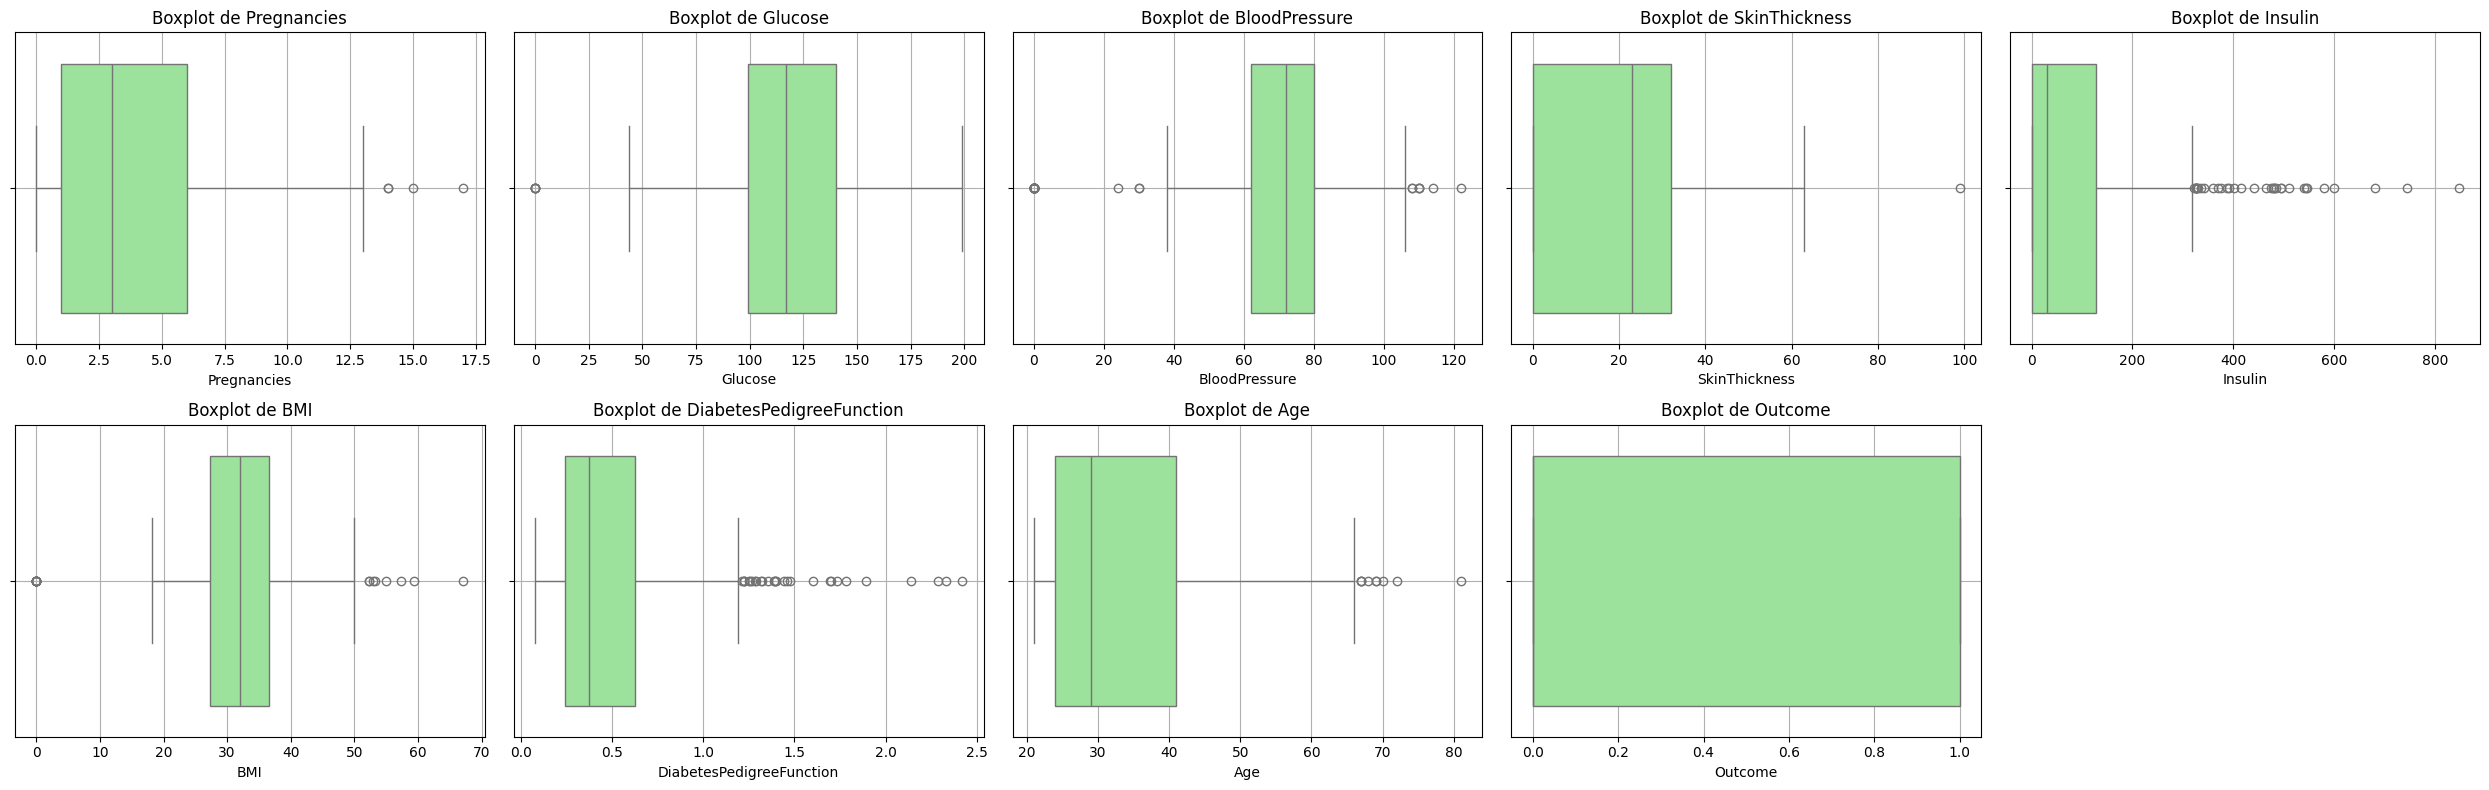

In [13]:
def boxplots(dataframe):
    num_cols = len(dataframe.columns)
    cols_per_row = 5  # quantos gr√°ficos por linha
    rows = math.ceil(num_cols / cols_per_row)

    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 4))
    axes = axes.flatten()  # deixa em lista para iterar

    for i, col in enumerate(dataframe.columns):
        sns.boxplot(x=dataframe[col], color='lightgreen', ax=axes[i])
        axes[i].set_title(f"Boxplot de {col}")
        axes[i].grid(True)

    # remove eixos vazios (se tiver)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

boxplots(df)

#### O que conclu√≠mos?

- `Insulin`: num primeiro momento tem muitos pontos fora dos bigodes para cima, indicando uma grande quantidade de valores atipicamente altos. Por√©m √© importante lembrar o tanto de valores **zero** essa coluna possui, e eles est√£o certamente influenciando esse resultado.

- `SkinThickness`, `BMI`, `BloodPressure`, `Pregnancies`, `DiabetesPedigreeFunction`: apresentam outliers, mas em menor quantidade. As quest√µes de zeros podem ter que ser levada em considera√ß√£o tamb√©m.

- `Age`: √© dificil falar de outlier com idade, por causa da natureza do atributo. N√£o vi anormalidades.

√â v√°lido usar nossa fun√ß√£o `boxplots` novamente ap√≥s tratar os zeros.


### 4.5 Correla√ß√µes
Uma forma bem interessante de analisar o cruzamento entre os atributos √© tamb√©m usar correla√ß√µes.

√â uma medida que mostra o quanto duas vari√°veis est√£o relacionadas entre si.
O resultado varia de -1 a 1:
- +1: correla√ß√£o perfeita e positiva (uma sobe, a outra tamb√©m sobe)
- 0: nenhuma correla√ß√£o (s√£o independentes)
- -1: correla√ß√£o perfeita e negativa (uma sobe, a outra desce)

Em compara√ß√£o, a scatter_matrix() ilustra visualmente o que a correla√ß√£o num√©rica tenta quantificar com df.corr().

Se duas vari√°veis t√™m alta correla√ß√£o positiva, voc√™ ver√° uma nuvem de pontos formando uma linha ascendente no gr√°fico.

Se a correla√ß√£o for baixa ou pr√≥xima de 0, o gr√°fico vai mostrar um nuvem desorganizada.

In [14]:
# Calculamos a correla√ß√£o entre todas as vari√°veis num√©ricas para entender como elas se relacionam entre si e com o diagn√≥stico (Outcome).
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

# 5. Tratamento dos dados
Depois de analisar bem nossos dados, chegou a hora de trat√°-los!

Antes de absolutamente qualquer coisa vamos copiar nosso dataframe `df` para um outro, o `df_treated`, e esse novo √© quem sofrer√° o tratamento.

Isso √© √∫til para podermos fazer compara√ß√µes mais para frente.

In [15]:
# Vamos separar os dataframes para, mais pra frente, podermos compar√°-los e ver a efetividade do nosso tratamento
df_treated = df.copy()


## 5.1 Tratando valores zerados
Vamos dar uma olhada novamente na nossa `zero_per_column`:

In [16]:
# Conjunto de dados que t√≠nhamos criado anteriormente para visualizar a quantidade e propor√ß√£o de zeros por colunas
zeros_per_column(df)

Quantidade de zeros  Porcentagem (%)
Insulin                                   374            48.70
SkinThickness                             227            29.56
Pregnancies                               111            14.45
BloodPressure                              35             4.56
BMI                                        11             1.43
Glucose                                     5             0.65
DiabetesPedigreeFunction                    0             0.00
Age                                         0             0.00

#### Como lidar com eles? Temos **v√°rias** op√ß√µes dentre elas:

1. Simplesmente remover as linhas contendo zero;
2. Substituir os valores de zero pela m√©dia, moda ou mediana a depender da l√≥gica da coluna;
  - **M√©dia**: bom para distribui√ß√µes sim√©tricas;
  - **Moda**: √∫til para vari√°veis categ√≥ricas;
  - **Mediana**: melhor para dados com dados discrepantes (*outliers*) ou assim√©tricos;
3. Imputar valores usando t√©cnicas como:
  - L√≥gica do mundo real (abstrato e perigoso, pode servir em situa√ß√µes espec√≠ficas);
  - Interpola√ß√£o, onde voc√™ pode preenchemos valores ausentes com base em pontos antes e depois. Faz muito mais sentido para dados temporais;
  - Utilizar modelos prontos de imputa√ß√£o como Regress√£o Linear, KNN, Redes Neurais, etc;

#### **E como escolher?**
1. Remover linhas geralmente √© a pior op√ß√£o exceto se os dados n√£o validos representarem um n√∫mero √≠nfimo de linhas, n√£o √© o nosso caso. Como vimos em `zero_per_column`, quase METADE das nossas linhas seriam removidas por causa da falta de dados em `Insulin`.
  - E n√£o, isso n√£o √© uma m√° interpreta√ß√£o da nossa parte, eu pesquisei. Realmente os dados de insulina est√£o faltantes em v√°rias das pessoas pesquisadas ¬≤ ¬≥.
2. Substitui√ß√£o simples vai funcionar para os casos com baixa taixa de zeros. `BMI` com 1,43%, `Glucose` com 0,65% e `BloodPressure` com 4,56% v√£o servir bem. Para todas elas utilizaremos a mediana, pois essas colunas possuem assimetria e valores discrepantes, como vimos nos histogramas.
3. O imputamento de valores vai funcionar para as colunas com quantidades altas de zeros:
  - `Insulin` (48% de zeros): utilizaremos Regress√£o Linear por ser uma vari√°vel clinica sabidamente relacionada com a `Glucose` e a `Age`;
  - `SkinThickness` (30% de zeros): utilizaremos o KNNImputer pois vimos uma rela√ß√£o forte com `BMI` e `Age`;


### 5.1.1 Resolvendo casos simples

In [17]:
# BMI -> Mediana
# Substitu√≠mos os valores zero da coluna Glucose pela sua mediana, pois zeros representam dados ausentes e n√£o valores reais.
df_treated.loc[df_treated["BMI"] == 0, "BMI"] = df_treated["BMI"].median()
(df_treated["BMI"] == 0).sum()

np.int64(0)

In [18]:
# Glucose -> Mediana
df_treated.loc[df_treated["Glucose"] == 0, "Glucose"] = df_treated["Glucose"].median()
(df_treated["Glucose"] == 0).sum()

np.int64(0)

In [19]:
# BloodPressure -> Mediana
df_treated.loc[df_treated["BloodPressure"] == 0, "BloodPressure"] = df_treated["BloodPressure"].median()
(df_treated["BloodPressure"] == 0).sum()

np.int64(0)

### 5.1.2 Usando KNN para imputar `SkinThickness`

O KNN (K-Nearest Neighbors) para imputa√ß√£o funciona encontrando as observa√ß√µes mais parecidas com a que tem o valor faltante, usando as demais vari√°veis como refer√™ncia.

No contexto biom√©trico, SkinThickness tem correla√ß√£o com vari√°veis como `BMI`, `Age`, `Glucose` e at√© `Insulin`, mas n√£o usaremos `Insulin` pois ela tamb√©m precisa ser tratada. Pessoas com caracter√≠sticas corporais semelhantes tendem a ter valores pr√≥ximos de dobra cut√¢nea.

Isso √© melhor do que simplesmente substituir pela m√©dia ou mediana, que ignoram essas rela√ß√µes.

In [20]:
from sklearn.impute import KNNImputer

# Substitui os zeros por NaN apenas na SkinThickness
skin_na = df_treated[['SkinThickness', 'BMI', 'Age', 'Glucose']].copy()
skin_na['SkinThickness'] = skin_na['SkinThickness'].replace(0, np.nan)

# Aplica o imputador
imputer = KNNImputer(n_neighbors=5)
skin_imputed = imputer.fit_transform(skin_na)

# Substitui SOMENTE a coluna SkinThickness original com os novos valores imputados
df_treated['SkinThickness'] = skin_imputed[:, 0]

In [21]:
(df_treated["SkinThickness"] == 0).sum()

np.int64(0)

In [22]:
df_treated.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72           35.0        0  33.6   
1            1       85             66           29.0        0  26.6   
2            8      183             64           30.8        0  23.3   
3            1       89             66           23.0       94  28.1   
4            0      137             40           35.0      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### 5.1.3 Usando Regress√£o Linear para preenchar o `Insulin`
A vari√°vel `Insulin` no Pima Indians Diabetes costuma ter alta correla√ß√£o com `Glucose` e `BMI`, afinal quanto maior glicose e IMC, maior tende a ser a insulina circulante.

Isso significa que √© poss√≠vel estimar valores de Insulin com uma regress√£o$^4$ baseada nessas vari√°veis preditoras. Como a rela√ß√£o √© relativamente mon√≥tona, ou seja, valores altos de glicose podem indicar valores altos de insulina, um modelo linear tende a funcionar bem.

**Vantagens sobre o KNN nesse caso:**

- **Mais r√°pido:** o modelo aprende uma √∫nica equa√ß√£o e aplica, sem precisar recalcular dist√¢ncias para cada linha.
- **Menos sens√≠vel √† dimensionalidade:** o KNN pode perder precis√£o se voc√™ usar muitas vari√°veis, enquanto a regress√£o foca no ajuste global.

**Observa√ß√£o engra√ßada:**

√â engra√ßado notar que no pr√≥ximo bloco de c√≥digo faremos um microexemplo contido de tudo que estamos fazendo em todo o notebook.

1. Primeiro definiremos quais outras colunas ser√£o usadas para isso;
2. Depois, separaremos a entrada em X e a sa√≠da em Y como verememos mais pra frente;
3. Em seguida, usa o modelo para prever os dados e substituir no `df`;

In [23]:
# Insulin -> Regress√£o Linear
# Importamos o modelo de Regress√£o Linear para prever valores ausentes da vari√°vel Insulin com base em outras vari√°veis do conjunto de dados.
from sklearn.linear_model import LinearRegression

# Fazemos esse teste s√≥ para nosso notebook n√£o precisar rodar tudo isso de novo caso o DF na mem√≥ria j√° esteja tratado
if ((df_treated["Insulin"] == 0).sum() > 0):
  df_treated['Insulin'] = df_treated['Insulin'].astype(float)

  # 1. Define as entradas que ser√£o usadas para prever a insulina
  features = ['Glucose', 'BMI', 'Age', 'BloodPressure']

  # 2. Separa os dados com valores v√°lidos de Insulin (‚â† 0)
  valid_data = df_treated[df_treated['Insulin'] != 0]

  # 3. Separa X e y para treinar o modelo
  X_train_ins = valid_data[features]
  y_train_ins = valid_data['Insulin']

  # 4. Treina o modelo de regress√£o
  model_insulin = LinearRegression()
  model_insulin.fit(X_train_ins, y_train_ins)

  # 5. Seleciona os dados com Insulin == 0 (ausentes)
  rows_without_data = df_treated[df_treated['Insulin'] == 0]
  X_pred_ins = rows_without_data[features]

  # 6. Usa o modelo para prever os valores ausentes
  predicted_values = model_insulin.predict(X_pred_ins)

  # 7. Substitui os zeros pelos valores preditos
  df_treated.loc[df_treated['Insulin'] == 0, 'Insulin'] = predicted_values

In [24]:
zeros_per_column(df_treated)

Quantidade de zeros  Porcentagem (%)
Pregnancies                               111            14.45
Glucose                                     0             0.00
BloodPressure                               0             0.00
SkinThickness                               0             0.00
Insulin                                     0             0.00
BMI                                         0             0.00
DiabetesPedigreeFunction                    0             0.00
Age                                         0             0.00

### 5.1.3 Visualiza√ß√£o p√≥s resolu√ß√£o dos zeros
Agora, usaremos o mesmo c√≥digo de visualiza√ß√£o de histogramas que usamos no conjunto de dados original, no conjunto de dados tratados.

E o que estamos buscando observar? `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` e `BMI` que possuiam zeros n√£o condizentes, agora n√£o deveram apresentar nenhum zeros, e ter uma distribui√ß√£o mais sim√©trica.

Agora podemos sobrer os histogramas de antes e depois do tratamento para observarmos nossos avan√ßos.

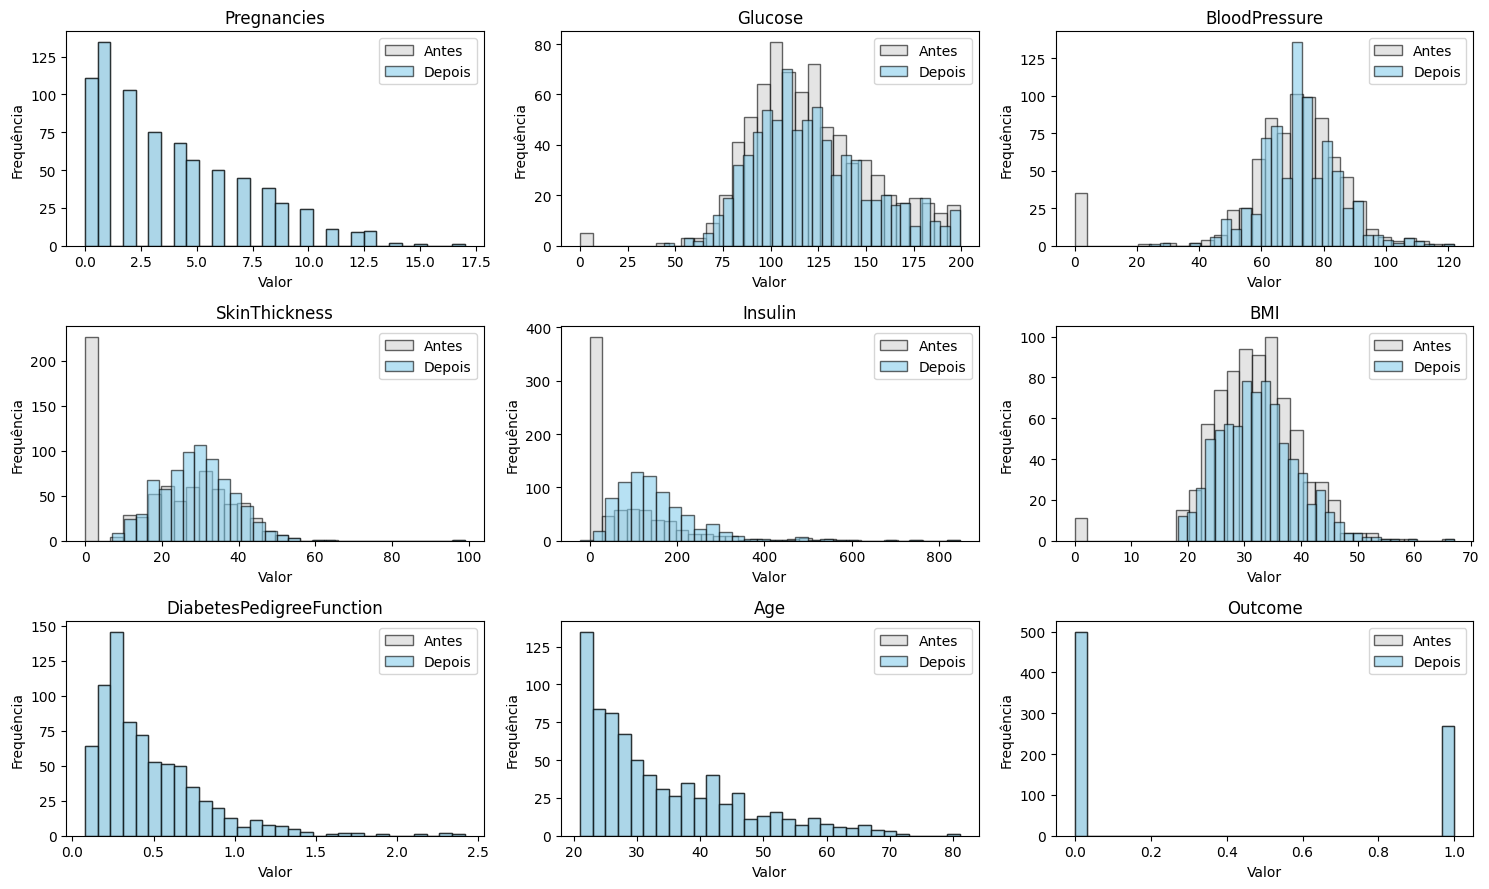

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 9))

for ax, col in zip(axes.flat, df_treated.columns):
    ax.hist(df[col], bins=30, color='lightgray', alpha=0.6, label='Antes', edgecolor='black')
    ax.hist(df_treated[col], bins=30, color='skyblue', alpha=0.6, label='Depois', edgecolor='black')
    ax.set_title(col)
    ax.set_ylabel("Frequ√™ncia")
    ax.set_xlabel("Valor")
    ax.legend()

plt.tight_layout()
plt.show()

## 5.2 E os *outliers* como ficam?

In [26]:
# Antes de qualquer coisa, deixaremos esse o `df_treated_with_outliers` como backup e trataremos o `df_treated`
df_treated_with_outliers = df_treated.copy()

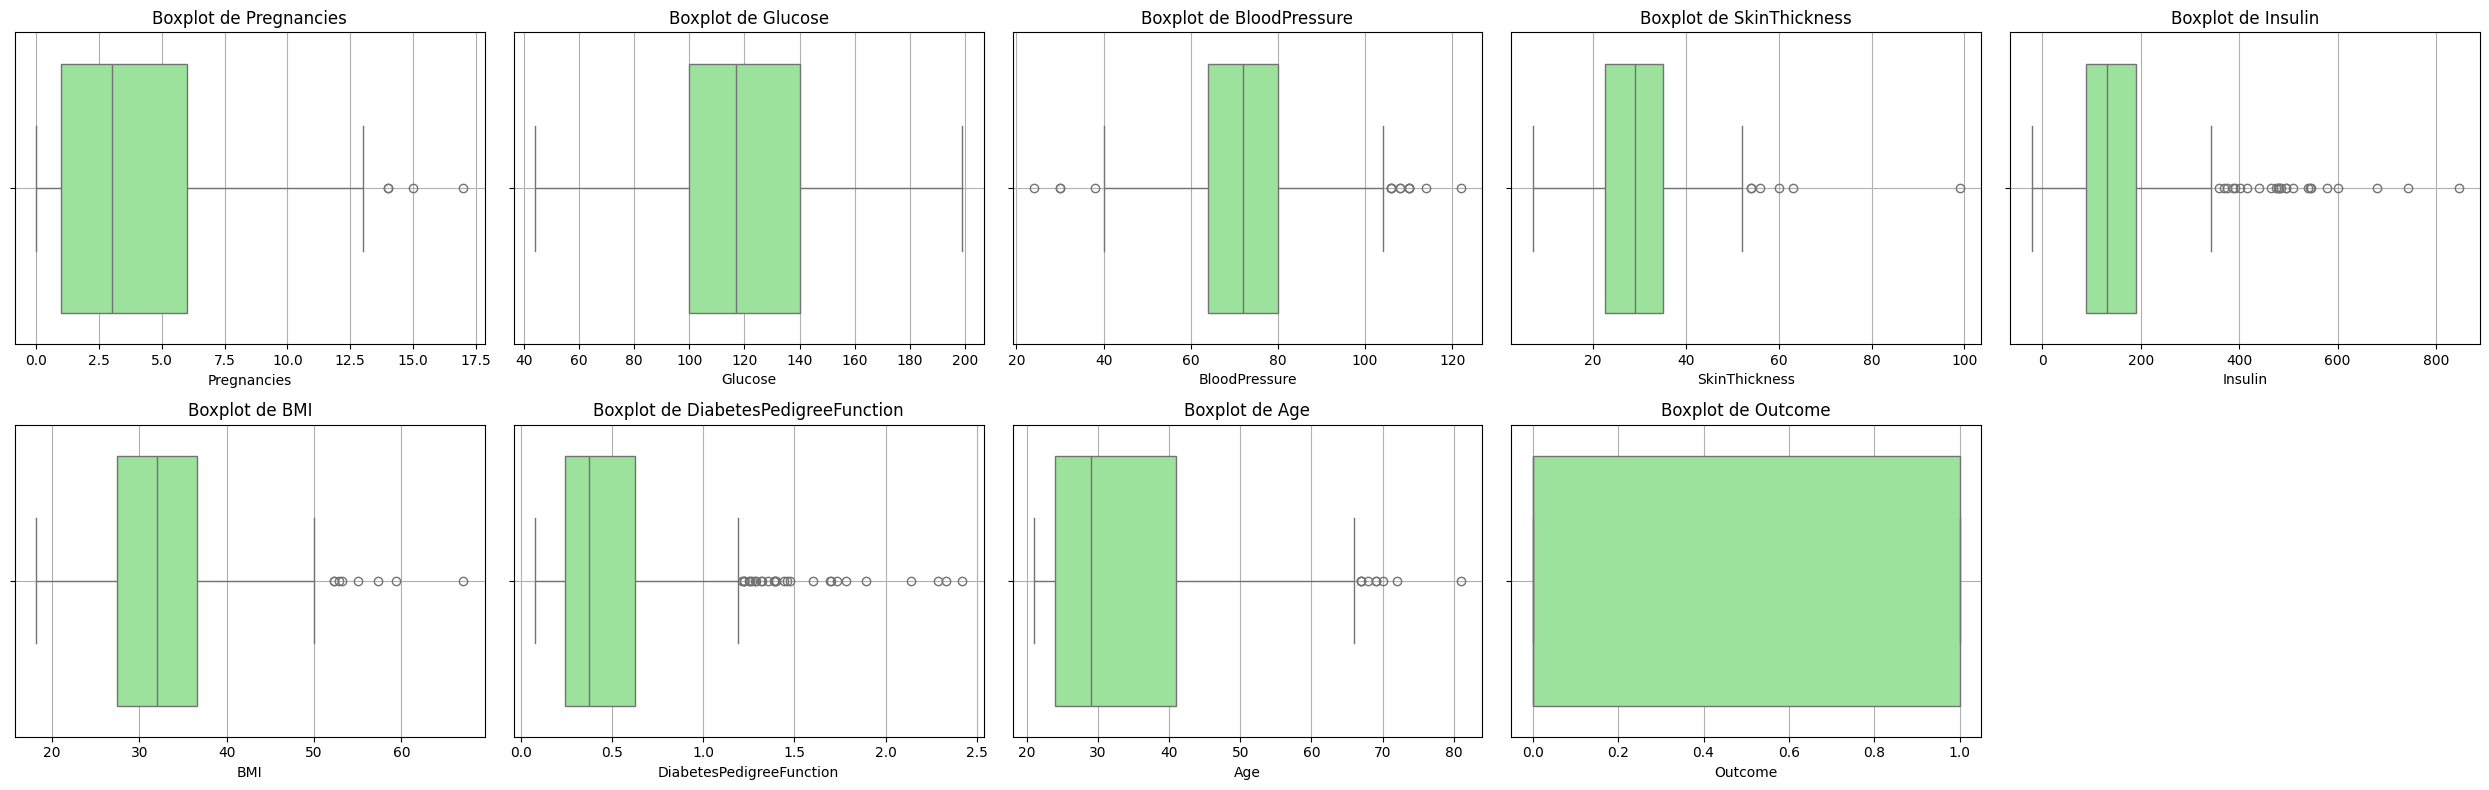

In [27]:
boxplots(df_treated)

Agora que os zeros foram tratados, os boxplots possivelmente mostram os valores discrepantes reais, ou seja, valores que est√£o muito distantes da faixa central dos dados.

**Mas ser√° que devemos trat√°-los?**

Antes de mais nada, n√£o vamos considerar gravidezes, ok? √â muito dificil de imaginar um erro de medi√ß√£o, s√£o poucos "dados discrepantes", n√£o parece ser uma entrada t√£o determinante para o `outcome` na nossa matriz de dispers√£o, e ainda tem uma aspecto cultural a ser respeitado.

1. **Contexto cl√≠nico**: em dados m√©dicos, alguns valores extremos podem ser casos reais e importantes (por exemplo, insulina muito alta pode indicar resist√™ncia severa √† insulina). Se o objetivo do modelo for diagn√≥stico, remover esses casos pode fazer o algoritmo perder informa√ß√µes valiosas.

2. **Sensibilidade do algoritmo**: modelos como Regress√£o Log√≠stica e √Årvores de Decis√£o lidam relativamente bem com outliers. Por√©m modelos baseados em dist√¢ncia (KNN, SVM, Redes Neurais) podem ter desempenho prejudicado, pois *outliers* distorcem c√°lculos de dist√¢ncia e escalas.

3. **Quantidade e dispers√£o**: em `Insulin` e `DiabetesPedigreeFunction` a dispers√£o √© muito grande, esses valores podem puxar a escala e atrapalhar a normaliza√ß√£o/padroniza√ß√£o. J√° em `BloodPressure`,  `BMI` e `SkinThickness`, os valores discrepantes s√£o menos extremos, mas ainda podem influenciar modelos sens√≠veis.

**E como vamos tratar?**

- Podemos simplesmenter manter tudo se forem clinicamente v√°lidos (ou seja, n√£o for sabido explicitamente que foi um erro de medi√ß√£o, e at√© ent√£o de fato n√£o s√£o) e o algoritmo escolhido tolerar bem *outliers*.
- Usar algoritmos de transforma√ß√£o para reduzir a influ√™ncia sem remover dados.
- Capar, ou seja, limitar os valores m√°ximos/m√≠nimos a um percentil (ex.: 1¬∫ e 99¬∫).
- Remover linha inteira, apenas se houver evid√™ncia de erro de medi√ß√£o.

Como testaremos v√°rios modelos, pode ser interessante separar um dataframe com o tratamento de discrepantes e outro n√£o.

#### Log x Box-Cox

Falaremos sobre duas principais transforma√ß√µes dos dados para lidar com valores discrepantes: a **transforma√ß√£o logar√≠tmica** e a **transforma√ß√£o Box-Cox** s√£o t√©cnicas comuns para reduzir a assimetria de vari√°veis num√©ricas e minimizar o impacto de *outliers*.

- **Log:** Mais simples, basicamente aplica `log(x)` (ou `log(x+1)` quando h√° zeros, n√£o √© mais nosso caso), comprimindo valores altos e tornando a distribui√ß√£o mais pr√≥xima da normal, mas assume que a rela√ß√£o de ajuste seja sempre a mesma.
- **Box-Cox:** √° o Box-Cox √© mais flex√≠vel: aplica uma transforma√ß√£o de pot√™ncia controlada por um par√¢metro ùúÜ, escolhido para aproximar a distribui√ß√£o de uma normal; quando Œª=0, o Box-Cox se comporta exatamente como o log.

Assim, enquanto o log √© direto e r√°pido, o Box-Cox adapta a intensidade da transforma√ß√£o a cada vari√°vel, podendo gerar distribui√ß√µes mais equilibradas.

Usaremos o apoio visual para decidir entre os dois. O c√≥digo a seguir faz as transforma√ß√µes localmente para estudarmos a diferen√ßa da simetria entre o original, o log e o box-cox.


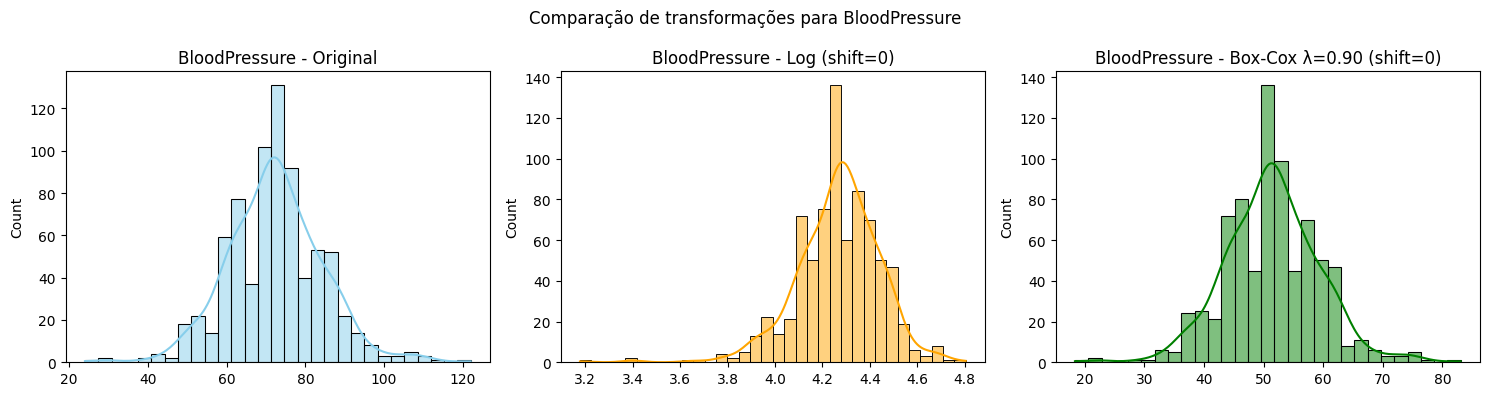

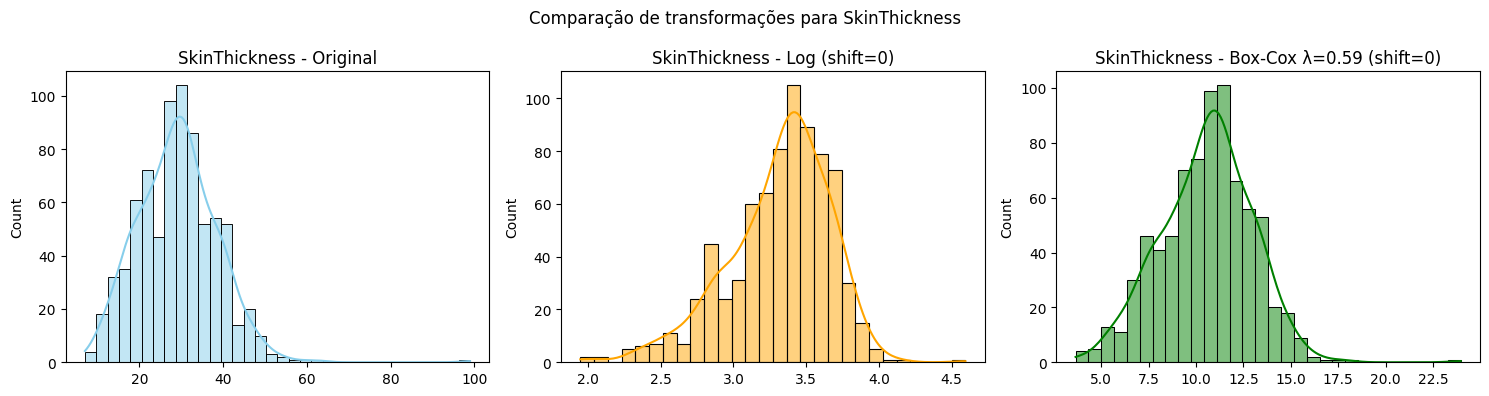

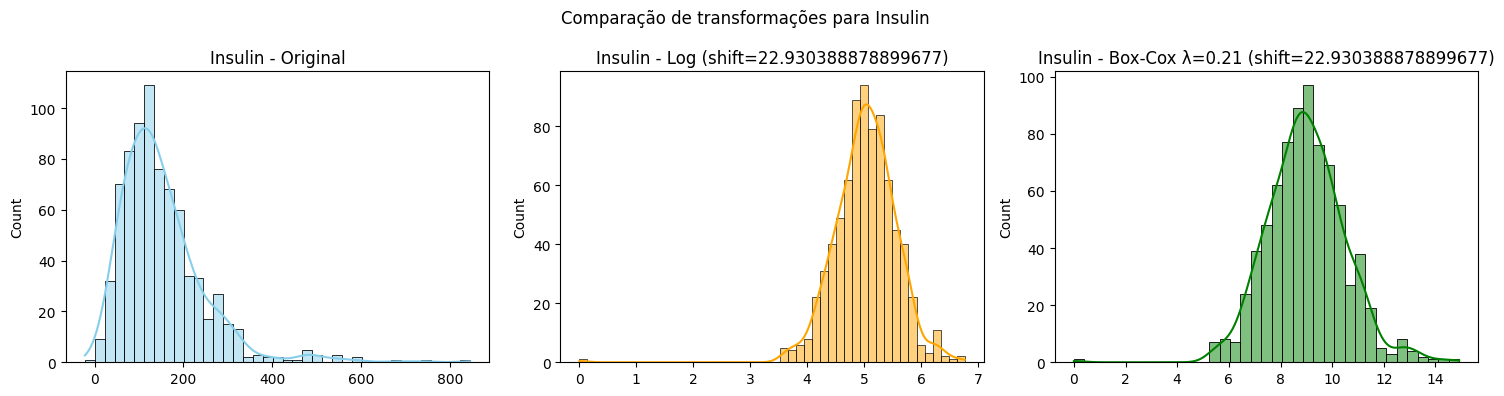

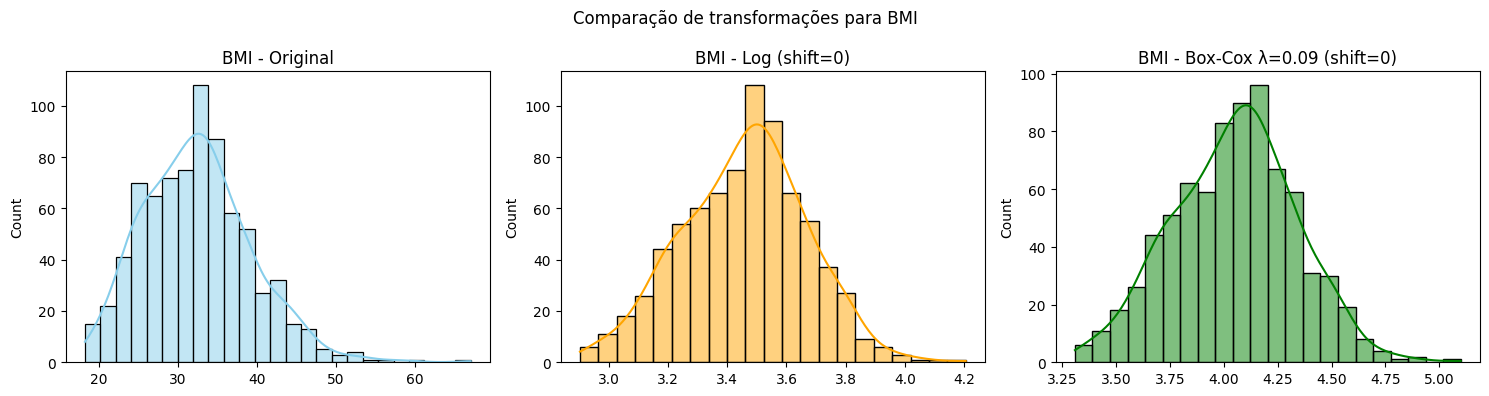

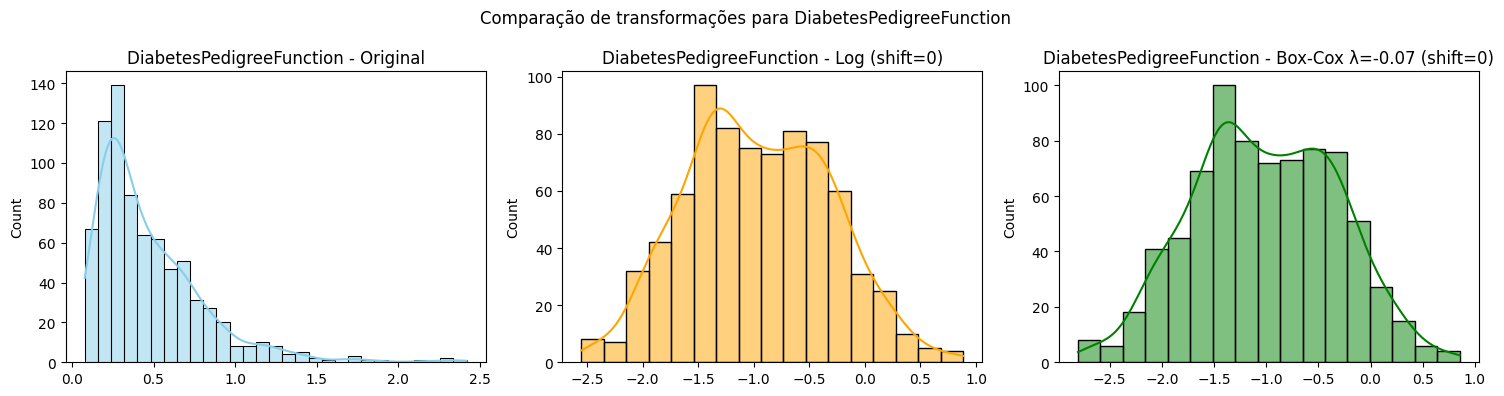

In [28]:
# Importa a fun√ß√£o boxcox do m√≥dulo scipy.stats, usada para aplicar a transforma√ß√£o Box-Cox em dados, tornando distribui√ß√µes mais pr√≥ximas da normalidade.
from scipy.stats import boxcox

cols = ['BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction']

for col in cols:
    original = df_treated[col].values

    # Garantir que todos sejam > 0 para as transforma√ß√µes
    min_val = original.min()
    if min_val <= 0:
        shift = abs(min_val) + 1
        original_shifted = original + shift
    else:
        shift = 0
        original_shifted = original.copy()

    # Transforma√ß√µes
    log_transformed = np.log(original_shifted)
    boxcox_transformed, fitted_lambda = boxcox(original_shifted)

    # Plot
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    sns.histplot(original, ax=axes[0], kde=True, color="skyblue")
    axes[0].set_title(f"{col} - Original")

    sns.histplot(log_transformed, ax=axes[1], kde=True, color="orange")
    axes[1].set_title(f"{col} - Log (shift={shift})")

    sns.histplot(boxcox_transformed, ax=axes[2], kde=True, color="green")
    axes[2].set_title(f"{col} - Box-Cox Œª={fitted_lambda:.2f} (shift={shift})")

    plt.suptitle(f"Compara√ß√£o de transforma√ß√µes para {col}")
    plt.tight_layout()
    plt.show()


Agora vamos analisar coluna por coluna:

- **BloodPressure**: escolher Box-Cox (Œª ‚âà 0.90), porque mant√©m a forma pr√≥xima da original, mas corrige levemente a assimetria. O log aqui distorce demais a escala e n√£o traz ganho real.

- **SkinThickness**: escolher Box-Cox (Œª ‚âà 0.59), pois reduziu a cauda direita sem achatar tanto a distribui√ß√£o quanto o log. Ficou mais sim√©trica e pr√≥xima de normal.

- **Insulin**: escolher Box-Cox (Œª ‚âà 0.21), porque ajustou melhor que o log, centralizando a curva e reduzindo bastante a assimetria. Esse √© um caso onde a diferen√ßa √© bem vis√≠vel.

- **BMI**: escolher Box-Cox (Œª ‚âà 0.09), j√° que ele suavizou de forma mais equilibrada que o log, deixando a distribui√ß√£o mais sim√©trica sem comprimir demais.

- **DiabetesPedigreeFunction:** Aqui tanto faz entre log e Box-Cox, porque o Œª ficou muito pr√≥ximo de 0 (-0.07), o que significa que o Box-Cox praticamente aplicou um log. Nesse caso, escolheria Box-Cox apenas por consist√™ncia com as outras vari√°veis.

Ou seja, vamos usar box-cox para todos:

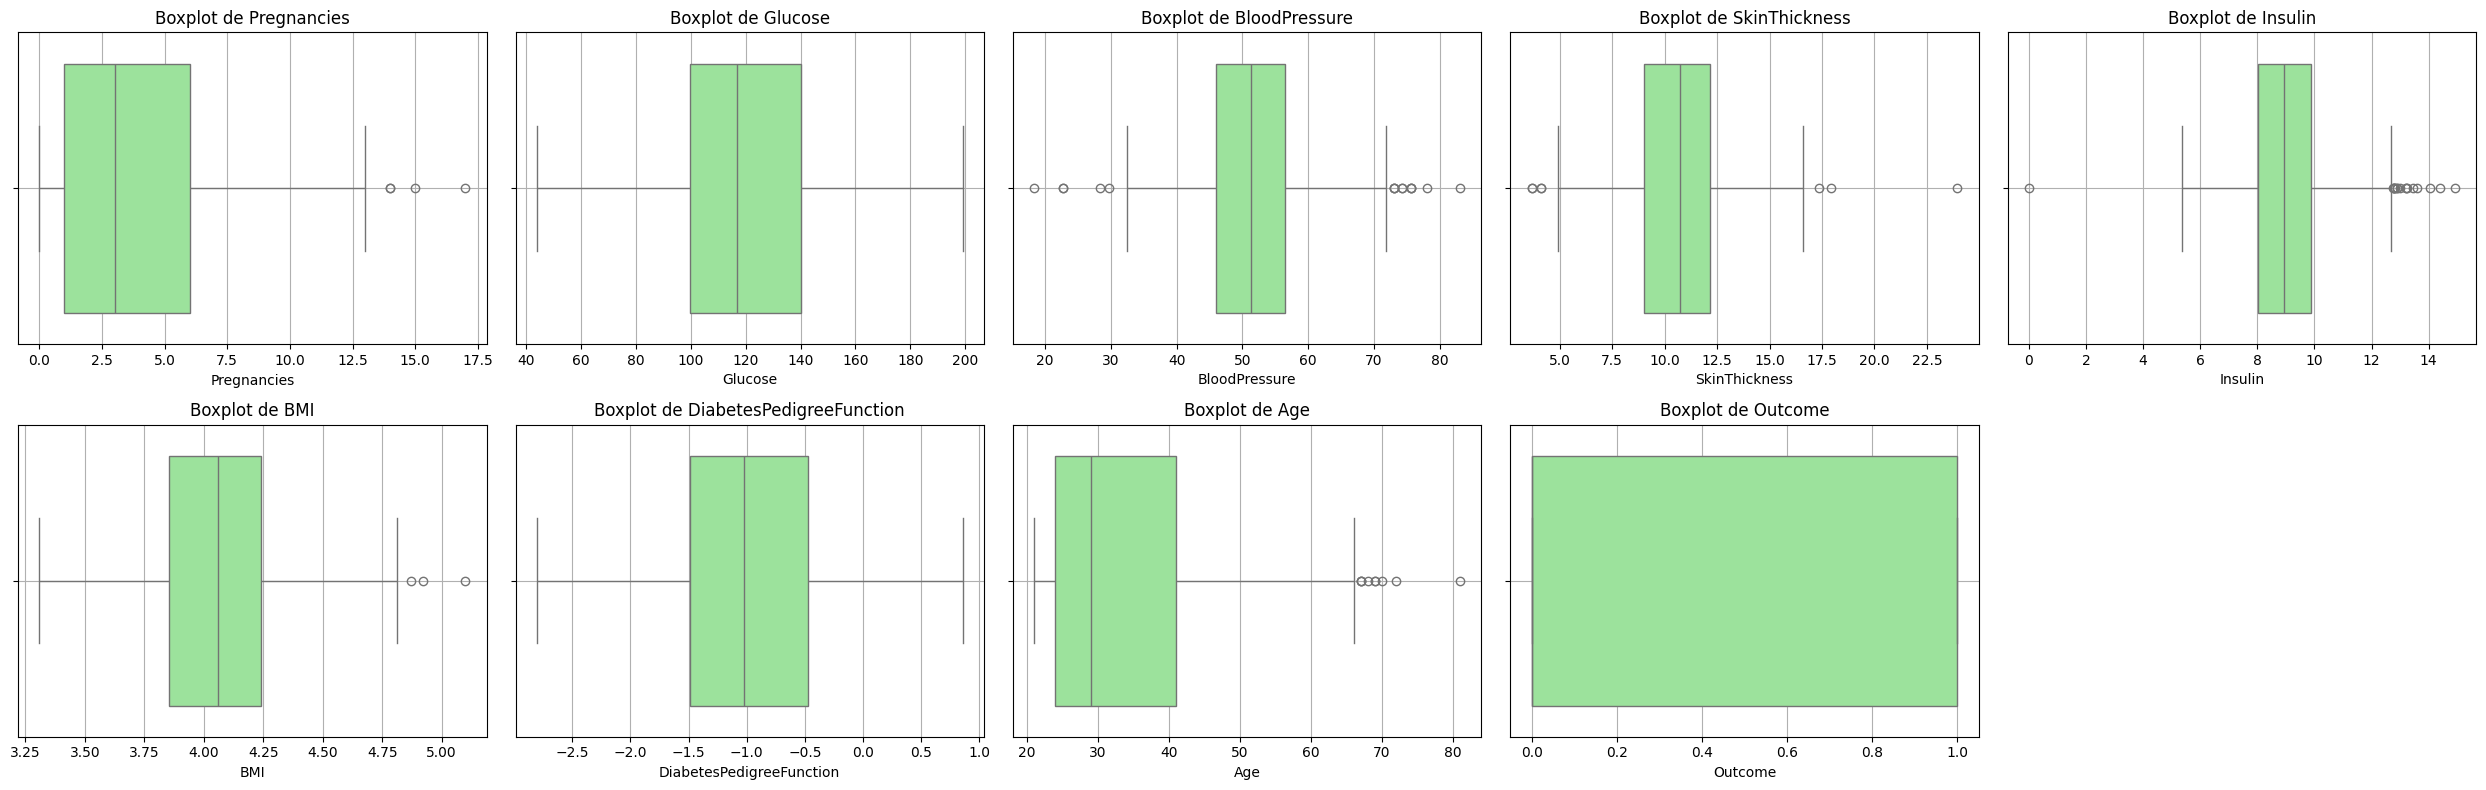

In [29]:
# Dicion√°rio para salvar os lambdas de cada coluna
boxcox_lambdas = {}

# Lista das colunas que vamos transformar com Box-Cox
cols_boxcox = [
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction'
]

for col in cols_boxcox:
    data = df_treated[col].values

    # Box-Cox exige valores estritamente positivos
    min_val = data.min()
    if min_val <= 0:
        shift = abs(min_val) + 1
        data = data + shift
    else:
        shift = 0

    # Aplica Box-Cox
    transformed, fitted_lambda = boxcox(data)

    # Salva no dataframe transformado
    df_treated[col] = transformed

    # Guarda o lambda e o shift usado
    boxcox_lambdas[col] = {
        'lambda': fitted_lambda,
        'shift': shift
    }

boxplots(df_treated)

# 6. Processamento dos dados
Agora que conhecemos bem os dados, e tratamos o que foi poss√≠vel, chegou a hora de pr√©-processar esse conjunto de dados para que ele fique dividido e formatado da melhor forma poss√≠vel para serem utilizados nos nossos modelos de treinamento.

Vamos:
- Definir quem √© entrada (X), quem √© sa√≠da (Y), bem no sentido matem√°tico mesmo `f(x) = y`, sabe?
- Escalar os dados para que eles funcionem melhor na maioria dos tipos de treinamentos;
- Dividir quantos dados v√£o ser usados para treinamento e quantos dados v√£o ser usados para teste.

In [30]:
# X representa os dados de entrada (tamb√©m chamados de "features" ou "vari√°veis explicativas", ou "atributos" como estavamos chamando).
# No nosso caso, tudo que n√£o √© a coluna `Outcome` influencia no resultado.
X = df_treated.drop(columns=["Outcome"])
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin       BMI  \
0            6      148      51.228506      12.167725  10.297460  4.124519   
1            1       85      47.281775      10.708073   7.390006  3.808657   
2            8      183      45.958441      11.157927  10.886361  3.632453   
3            1       89      47.281775       9.118643   8.165147  3.882241   
4            0      137      29.708085      12.167725   9.563903  4.468470   

   DiabetesPedigreeFunction  Age  
0                 -0.474866   50  
1                 -1.088080   31  
2                 -0.403329   32  
3                 -1.912132   21  
4                  0.803134   33

In [31]:
# Y representa a resposta esperada, ou seja, o alvo que queremos que o modelo aprenda a prever.
Y = df_treated['Outcome']
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Antes de treinar qualquer um dos nosso modelos IA, √© muito importante separar parte dos dados para testar se o modelo est√° realmente aprendendo, e n√£o s√≥ memorizando.

- (Treino) x_train, y_train: usado para ensinar o modelo, onde `x_train` s√£o os dados de entrada, e `y_train` os resultados sabidos.
- (Teste) x_test, y_test: usado para avaliar se o modelo aprendeu bem com dados que ele nunca viu, ou seja, ele vai colocar `x_test` no modelo, e ver qu√£o bem ele acerta `y_test`;
- (Propor√ß√£o Teste/Treino) test_size = 0.20: reserva 20% dos dados reais para teste.
- (Estratifica√ß√£o) stratify = y: garante que a propor√ß√£o das classes em y seja mantida tanto no conjunto de treino quanto no conjunto de teste.
- (Semente de aleatoriedade) random_state: define como o conjunto de dados ser√° embaralhado.

> Sobre semente de aleatoriedade: a propor√ß√£o n√£o vai simplesmente pegar os 80% primeiros para treino e os 20% √∫ltimos para testes. √â uma boa pr√°tica embaralhar os dados at√© para n√£o enviesar os resultados com a ordem da captura. Mas "como embaralhar?", isso depende da **semente de aleatoriedade**, que √© definida por um n√∫mero arbitr√°rio. Se n√£o passarmos nenhum `random_state` esse n√∫mero sempre mudar√°, o que quer dizer que sempre que este c√≥digo for rodado, um novo resultado ser√° gerado, acabando com nossa consist√™ncia e dificultado comparar modelos, bases, etc. Por isso, definimos um n√∫mero arbitrariamente que n√£o mudar√°, portanto, o conjunto de dados sempre ser√° embaralhado da mesma forma. √â comum usar "42" por causa do Guia dos Mochileiros das Gal√°xias, mas eu escolhi uma combina√ß√£o de n√∫meros mais especial. :D



In [32]:
# Importamos a fun√ß√£o que permite dividir os dados em conjuntos de treino e teste, o que √© essencial para avaliar a capacidade do modelo de generalizar para novos dados.
from sklearn.model_selection import train_test_split

# Dividimos os dados em treino (80%) e teste (20%) de forma aleat√≥ria, mas reprodut√≠vel. Isso permite treinar o modelo e depois avali√°-lo com dados que ele nunca viu.
raw_x_train, raw_x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, stratify = Y, random_state=872008)

Agora que tudo est√° divido, est√° na hora de de padrozinar os dados:

In [33]:
# Importamos o StandardScaler para padronizar os dados, deixando todas as vari√°veis com m√©dia 0 e desvio padr√£o 1 ‚Äî isso ajuda muitos modelos a terem um desempenho melhor.
from sklearn.preprocessing import StandardScaler

In [34]:
# Criamos o objeto StandardScaler, que ser√° usado para padronizar os dados num√©ricos (m√©dia 0, desvio padr√£o 1).
scaler = StandardScaler()

# Aqui, o scaler aprende a m√©dia e o desvio padr√£o de cada coluna dos dados de entrada, preparando-se para padroniz√°-los.
scaler.fit(raw_x_train)

# Aplicamos a padroniza√ß√£o nos dados, transformando as vari√°veis para que tenham m√©dia 0 e desvio padr√£o 1 ‚Äî o que ajuda muitos modelos a ter um melhor desempenho.
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

Agora temos o nosso conjunto de dados (exceto o `Outcome`) transformado com o `StandardScaler`. Cada valor na tabela agora representa a dist√¢ncia em desvios-padr√£o em rela√ß√£o √† m√©dia da respectiva coluna.

**Exemplo:** um valor 1.94 em "Glucose" significa que a pessoa tem uma glicose 1.94 desvios-padr√£o acima da m√©dia da popula√ß√£o.

Vale dize que a transforma√ß√£o s√≥ acontece no X, de fato, pois eles que precisam estar em um "formato melhor" para os modelos de treinamento tentarem funcionar da melhor forma poss√≠vel.

Para fins de compara√ß√µes futuras, seria interessante termos uma combina√ß√£o dos nossos dados:
- ‚úÖ Divis√£o de treino/teste, usando `StandardScaler` no `df_treated`;
- ‚åõ Divis√£o de treino/teste, usando `StandardScaler` no `df_treated_with_outliers`;
- ‚åõ Divis√£o de treino/teste, usando o `StandardScaler` no `df`, que **n√£o** tratamos os dados;
- ‚åõ Divis√£o de treino/teste, **sem usar** o `StandardScaler` no `df_treated`;
- ‚åõ Divis√£o de treino/teste, **sem usar** o `StandardScaler` no `df_treated_with_outliers`;
- ‚åõ Divis√£o de treino/teste, **sem usar** o `StandardScaler` no `df`, que **n√£o** tratamos os dados.

Vamos fazer todos esses teste na sess√£o "Ap√™ndice: Testrando se o tratamento faz diferen√ßa".

Para evitar replica√ß√£o desnecess√°ria de c√≥digo, vamos criar uma fun√ß√£o que faz exatamente o que fizemos anteriormente:

In [35]:
def train_test_split_inner(dataframe, use_scaler):
  X = dataframe.drop(columns=["Outcome"])
  Y = dataframe["Outcome"]
  raw_x_train, raw_x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, stratify = Y, random_state=872008)
  if (use_scaler):
    scaler = StandardScaler()
    scaler.fit(raw_x_train)
    x_train = scaler.transform(raw_x_train)
    x_test = scaler.transform(raw_x_test)
    return x_train, x_test, y_train, y_test
  return raw_x_train, raw_x_test, y_train, y_test

N√£o precisamos usar essa fun√ß√£o AGORA, mas √© √∫til ter criarmos ela para no futuro fazermos as compara√ß√µes das possibilidades sem tratamento e sem escalamento.

# 7. Treinamentos
Chegou a hora de treinar os modelos com a divis√£o que fizemos.

#### **Qual √© a l√≥gica?**

Existem **DIVERSOS** classificadores (*classifiers*), que podemos chamar de modelos. Eles s√£o algoritmos que usam das mais diversas t√©cnicas matem√°ticas e estat√≠sticas com um √∫nico objetivo: aprender para prever.

#### **Aprendendo**

Todos eles v√£o usar o `x_train` para tentar aprender como ele gera o resultado descrito em `y_train`. Lembra que que `x_train` s√£o 80% dos dados com todas as entradas, ou seja, sem `Outcome`, e `y_train` s√£o os mesmos 80% s√≥ que s√≥ com com os resultados `Outcome`.

Isso acontece no m√©todo `.fit(x_train, y_train)`, que **TODOS** os classificadores que usaremos possuem.

Pronto, modelo treinado.

#### **Prevendo**

Agora precisamos testar se o modelo est√° prevendo bem e, para isso, existem v√°rias m√©tricas que falaremos detalhadamente mais para frente, dentre elas, acur√°cia, precis√£o, recall e F1. Leia com calma sobre essas m√©tricas na conclus√£o.

Como funciona?

Vamos passar o `x_test` no modelo. Lembra que o `x_test` s√£o aqueles 20% dos dados que escolhemos para validar nossos modelos, por√©m ele n√£o cont√©m o "gabarito", que est√° em `y_test`. Para "passar" o `x_test` no modelo usamos um m√©todo `.predict(x_test)`, que tamb√©m **TODOS** os classificadores que usaremos possuem. Isso gera uma lista de resultados de previs√£o.

Por fim, precisamos apenas comparar os resultados de previs√£o com o "gabarito", os resultados reais. Usaremos as m√©tricas que comentamos para entender qu√£o bem a predi√ß√£o acerta baseado em crit√©rios diferentes a depender de cada m√©trica.

## 7.1 Importa√ß√µes

N√£o se assuste! Aqui importamos diversos classificadores que funcionam com a l√≥gica de `.fit` de `.predict`. Existem outras formas de treinar previsores bin√°rios, mas focaremos nesses por fins did√°ticos.

In [36]:
# Importa a fun√ß√£o time do m√≥dulo time, que retorna o hor√°rio atual em segundos desde a √©poca Unix, √∫til para medir a dura√ß√£o de processos.
from time import time
# Importa do m√≥dulo sklearn.metrics as fun√ß√µes accuracy_score, precision_score, recall_score e f1_score, usadas para avaliar o desempenho de modelos de Machine Learning.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Importa uma ampla variedade de algoritmos de classifica√ß√£o de diferentes m√≥dulos do scikit-learn, al√©m dos classificadores XGBClassifier (XGBoost) e LGBMClassifier (LightGBM).
# Esses modelos incluem m√©todos lineares, de vizinhos, √°rvores de decis√£o, florestas aleat√≥rias, boosting, redes neurais, Naive Bayes, SVM e classificadores de base (Dummy),
# permitindo testar e comparar m√∫ltiplas abordagens de Machine Learning em tarefas de classifica√ß√£o.
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.svm import SVC
from sklearn.ensemble import (
    GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier,
    AdaBoostClassifier, RandomForestClassifier, HistGradientBoostingClassifier,
    VotingClassifier, StackingClassifier
)
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## 7.2 Classe para registro de resultados

A classe a seguir √© opcional, decidi cri√°-la para registrar os resultados de cada um dos classificadores que utilizaremos. Vai ser bastante √∫til para compararmos os modelos posteriormente.

Sua estrutura √© simples, ela inicializa atributos no construtor para cada informa√ß√£o que queremos guardar, como:

- `name`: nome do classificador;
- `classifier`: modelo, espera-se que j√° treinado;
- `accuracy`: acur√°cia alcan√ßada;
- `precision`: precis√£o alcan√ßada;
- `recall`: valor de recall alcan√ßado;
- `f1`: valor de f1 alcan√ßado;
- `time`: tempo que levou o treinamento mais o teste;

In [37]:
class TrainResult:
  def __init__(self, name, classifier, accuracy, precision, recall, f1, time):
    self.name = name
    self.classifier = classifier
    self.accuracy = accuracy
    self.precision = precision
    self.recall = recall
    self.f1 = f1
    self.time = time

  def __str__(self):
      return (
          f"{self.name}\n" +
          "Acur√°cia : {0:.2f}%\n".format(self.accuracy) +
          "Precis√£o : {0:.2f}%\n".format(self.precision) +
          "Recall Score: {0:.2f}%\n".format(self.recall) +
          "F1 Score : {0:.2f}%\n".format(self.f1) +
          "Tempo de treino e teste: {0:.2f}s\n".format(self.time)
      )

## 7.3 Fun√ß√£o para treinar os modelos

Poder√≠amos fazer isso direto no *notebook*, por√©m criar uma fun√ß√£o √© √∫til para, mais na frente, treinarmos todos os modelos com os dataframes que n√£o passaram por tratamento ou Scaler.

A l√≥gica da fun√ß√£o √©:

- `models`: Nomeia e inicializa cada um dos classificadores. √â importante dizer que certamente eles n√£o est√£o perfeitamente configurados: todos eles possuem par√¢metros e poucos foram realmente usados. Em uma situa√ß√£o real, dever√≠amos explorar essas configura√ß√µes baseado na natureza dos dados, nos nossos objetivos, e no pr√≥prio estudo do fluxo de processamento.
- `results`: Array vazio para adicionarmos inst√¢ncias de `TrainResult` que criaremos para cada modelo;
- `time`: Utilizamos time para mensurar o quanto tempo demorou para treinar e testar cada modelo;

Depois disso, dentro do `for` fazemos exatamente o que tinhamos dito: treinar com o `fit`, prever com o `predict`, analisar com as m√©tricas, e guardar tudo isso em uma inst√¢ncia de `TrainResult`.

In [38]:
def train_models(x_train, x_test, y_train, y_test):
  models = [
    ("Logistic Regression", LogisticRegression()),
    ("SVC", SVC()),
    ("Gradient Boosting Classifier", GradientBoostingClassifier()),
    ("Extra Trees Classifier", ExtraTreesClassifier()),
    ("Bagging Classifier", BaggingClassifier()),
    ("AdaBoost Classifier", AdaBoostClassifier()),
    ("Gaussian NB", GaussianNB()),
    ("Bernoulli NB", BernoulliNB()),
    ("MLP Classifier", MLPClassifier()),
    ("XGB Classifier", XGBClassifier()),
    ("LGBM Classifier", LGBMClassifier(verbose=-1)),
    ("K Nearest Neighbour Classifier", KNeighborsClassifier()),
    ("Decision Tree Classifier", DecisionTreeClassifier()),
    ("Random Forest Classifier", RandomForestClassifier()),
    ("LDA", LinearDiscriminantAnalysis()),
    ("QDA", QuadraticDiscriminantAnalysis()),
    ("SGD-Log", SGDClassifier(loss="log_loss", alpha=1e-3, class_weight="balanced", max_iter=2000)),
    ("RidgeClf", RidgeClassifier()),
    ("HGB", HistGradientBoostingClassifier()),
    ("Calibrated SVC", CalibratedClassifierCV(cv=5)),
    ("Passive Aggressive", PassiveAggressiveClassifier()),
    ("Perceptron", Perceptron()),
    ("Dummy Classifier", DummyClassifier(strategy="most_frequent")),
    # Ensemble avan√ßados (Voting e Stacking precisam receber estimadores)
    ("Voting Classifier (Hard)", VotingClassifier(estimators=[
        ('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('svc', SVC())
    ], voting='hard')),
    ("Voting Classifier (Soft)", VotingClassifier(estimators=[
        ('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('svc', SVC(probability=True))
    ], voting='soft')),
    ("Stacking Classifier", StackingClassifier(
        estimators=[('rf', RandomForestClassifier()), ('gb', GradientBoostingClassifier())],
        final_estimator=LogisticRegression()
    ))
  ]

  results = []

  for name, classifier in models:
    t0 = time()

    classifier.fit(x_train, y_train)
    pred_y = classifier.predict(x_test)

    train_test_time = time() - t0

    acc = accuracy_score(y_test, pred_y) * 100
    pre = precision_score(y_test, pred_y) * 100
    rec = recall_score(y_test, pred_y) * 100
    f1 = f1_score(y_test, pred_y) * 100

    results.append(TrainResult(name, classifier, acc, pre, rec, f1, train_test_time))

  return results

Depois de definida a fun√ß√£o, usamos ela e guardamos o resultado.

In [39]:
results = train_models(x_train, x_test, y_train, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
# Vamos s√≥ printar uma delas para ver o resultado:
print(results[0])

Logistic Regression
Acur√°cia : 76.62%
Precis√£o : 70.45%
Recall Score: 57.41%
F1 Score : 63.27%
Tempo de treino e teste: 0.01s



# 8. Compara√ß√µes e escolha do modelo
Agora, precisamos de uma forma de comparar os modelos visualmente. Para isso vamos criar uma fun√ß√£o que plota dois gr√°ficos:

- Uma tabela (heatmap) para comparar as m√©tricas obtidas de cada modelo;
- E um gr√°fico de pirulito para compararmos o tempo

Mais uma vez, o objetivo de criar uma fun√ß√£o √© que mais para frente poderemos reutilizar para comparar com os conjuntos de dados que n√£o foram tratados.

In [41]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# --- sua fun√ß√£o, agora parametrizada por 'sort_by'
def plot_results_summary(results, sort_by='Recall'):
    # -> DataFrame
    df = pd.DataFrame({
        'Modelo':   [r.name for r in results],
        'Acur√°cia': [r.accuracy for r in results],
        'Precis√£o': [r.precision for r in results],
        'Recall':   [r.recall for r in results],
        'F1-score': [r.f1 for r in results],
        'Tempo (s)': [r.time for r in results],
    })

    # m√©trica escolhida: desc p/ m√©tricas de qualidade, asc p/ tempo
    descending = sort_by != 'Tempo (s)'
    df = df.sort_values(sort_by, ascending=not descending).reset_index(drop=True)

    # Figura com 2 pain√©is: (heatmap | lollipop do tempo)
    sns.set_theme(style="whitegrid")
    fig = plt.figure(figsize=(30, 9))
    gs = fig.add_gridspec(nrows=1, ncols=2, width_ratios=[3.0, 1.6], wspace=0.25)

    # --- Painel 1: Heatmap de m√©tricas (0-100%)
    ax0 = fig.add_subplot(gs[0, 0])
    metrics = df.set_index('Modelo')[['Acur√°cia', 'Precis√£o', 'Recall', 'F1-score']]
    hm = sns.heatmap(
        metrics,
        annot=True, fmt=".1f", cmap="YlGnBu",
        vmin=0, vmax=100, linewidths=0.5, linecolor='white',
        cbar=False, ax=ax0
    )
    ax0.set_title(f"Acur√°cia, Precis√£o, Recall e F1 (%) ‚Äî ordenado por {sort_by}")
    ax0.set_xlabel(""); ax0.set_ylabel("")

    # --- Painel 2: Lollipop de tempo
    ax1 = fig.add_subplot(gs[0, 1])
    y = np.arange(len(df))
    x = df['Tempo (s)'].values
    ax1.hlines(y=y, xmin=0, xmax=x, color='lightgray', lw=2, zorder=1)
    ax1.plot(x, y, 'o', ms=8, zorder=2)
    ax1.set_yticks(y); ax1.set_yticklabels(df['Modelo'])
    ax1.invert_yaxis()  # topo = melhor conforme ordena√ß√£o aplicada

    if (x.max() / max(x.min(), 1e-9)) > 15:
        ax1.set_xscale('log'); ax1.set_xlabel("Tempo (s) ‚Äî escala log")
    else:
        ax1.set_xlabel("Tempo (s)")
    ax1.set_title("Velocidade de treino+teste")

    for xi, yi in zip(x, y):
        ax1.annotate(f"{xi:.2f}s", (xi, yi),
                     xytext=(6, 0), textcoords="offset points",
                     va='center', fontsize=9)

    fig.suptitle("Comparativo √∫nico de qualidade (heatmap) e velocidade (lollipop)", y=0.98, fontsize=14)
    plt.tight_layout()
    plt.show()

# --- widget de ordena√ß√£o
dd = widgets.Dropdown(
    options=['Recall', 'F1-score', 'Precis√£o', 'Acur√°cia', 'Tempo (s)'],
    value='Recall',
    description='Ordenar por:',
)

out = widgets.Output()

def _redraw(change=None):
    with out:
        clear_output(wait=True)
        plot_results_summary(results, sort_by=dd.value)

dd.observe(_redraw, names='value')

display(dd)
_redraw()
display(out)

Dropdown(description='Ordenar por:', options=('Recall', 'F1-score', 'Precis√£o', 'Acur√°cia', 'Tempo (s)'), valu‚Ä¶

Output()

# 9. Conclus√µes

## 9.1 Qual modelo escolher?

### 9.1.1 Tempo de treino e testes
Vamos come√ßar falando sobre o tempo. √â importante lembrar que nossa base de dados possui `.shape` (768, 9), ou seja, 768 linha e 9 colunas. Com essa forma, todo o tempo de processamento √© praticamente instant√¢neo, variando entre 0 e 3 segundos.

Ent√£o essa m√©trica pode ser descartada para tomada de decis√£o.

### 9.1.2 Baseline (Dummy Classifier)
Antes de mais nada vamos falar da import√¢ncia do "Dummy Classifier". Ele √© nosso "piso", no sentido de que "o modelo que vamos escolher, ele precisa ser pelo menos melhor que isso".

Anteriormente t√≠nhamos configurado ele como "Most Frequencie", ent√£o, basicamente ele vai observar nosso `y_train` e notar se aparece mais 0 ou 1. Anotado isso, digamos que seja 0, para TODAS as entradas em `x_test` ele ir√° dizer que √© 0.

Parece besta n√©? Mas fazendo isso ele ainda conseguiu uma acur√°cia de 64.9%, mais da metade de acertos. √â a famosa hist√≥ria de "at√© um rel√≥gio quebrado est√° certo duas vezes por dia".

Precisamos fazer melhor do que isso!

Mas qu√£o melhor? "Um modelo que prev√™ com 100% de acerto √© o melhor modelo poss√≠vel n√©?" Na verdade, n√£o. Esse seria um problema de **overfitting**, ou seja, nosso modelo ficou MUITO BOM em prever apenas a nossa base de dados, mas ao tentar generalizar para situa√ß√µes fora dela, ele vai se perder!

Ent√£o sabemos que, queremos algo MAIOR QUE 64.9% e MENOR QUE 100%.

### 9.1.3 Qual a m√©trica dever√≠amos priorizar?
- **Acur√°cia (Accuracy)**: propor√ß√£o de acertos sobre todas as previs√µes;
  - **Ponto forte:** f√°cil de entender.
  - **Ponto fraco:** pode enganar em bases desbalanceadas, no Pima Indians, se 65% dos pacientes n√£o t√™m diabetes, um modelo que prev√™ ‚Äún√£o‚Äù para todo mundo teria 65% de acur√°cia, mas n√£o serve para diagn√≥stico.
- **Precis√£o (Precision)**: De todas as previs√µes de positivo, quantas realmente eram positivas.
  - **Ponto forte:** alta precis√£o, ou seja, poucos falsos positivo. No contexto m√©dico, isso significa evitar diagnosticar diabetes em quem n√£o tem.
  - **Ponto fraco:** um modelo pode ter alta precis√£o e mesmo assim deixar passar v√°rios casos positivos (baixo recall)
- **Recall (Sensibilidade ou Sensibilidade Verdadeira):** de todos os casos realmente positivos, quantos o modelo detectou.
  - Alta sensibilidade, ou seja, poucos falsos negativos.
  - No contexto m√©dico, significa detectar a maioria das pessoas com diabetes. Baixo recall pode ser perigoso, porque significa que o modelo est√° deixando muitos pacientes doentes sem diagn√≥stico.
- **F1-Score:** A m√©dia harm√¥nica entre Precis√£o e Recall.
  - √â √∫til quando voc√™ quer um equil√≠brio entre n√£o dar falso positivo demais e n√£o deixar passar casos positivos. √â especialmente relevante em datasets desbalanceados.

**Arrisco a dizer que Recall √© a nossa m√©trica mais importante.** Em diagn√≥stico m√©dico, o pior erro poss√≠vel √© um **falso negativo**, ou seja, quando um paciente doente que recebe diagn√≥stico de ‚Äúsaud√°vel‚Äù.

Isso porque pode gerar um atraso no tratamento, reduzindo as chances de cura ou controle da doen√ßa. Aumenta o risco de agravamento, j√° que o paciente continua sem acompanhamento. E ainda possui impactos √©ticos e legais, onde m√©dicos e hospitais podem ser responsabilizados por neglig√™ncia diagn√≥stica.

J√° o falso positivo (quando o modelo diz que h√° doen√ßa, mas n√£o h√°) tamb√©m √© indesejado, mas as consequ√™ncias s√£o geralmente menos graves: causa ansiedade, custo de exames adicionais e tempo gasto, mas n√£o coloca a vida em risco imediato.

Por isso, maximizar o Recall garante que quase todos os pacientes com a doen√ßa sejam identificados, mesmo que isso signifique aumentar um pouco o n√∫mero de falsos positivos. Em termos pr√°ticos, no hospital √© prefer√≠vel chamar para novos exames alguns pacientes que n√£o t√™m a doen√ßa do que deixar um √∫nico paciente grave ir para casa sem diagn√≥stico.

O **F1-score** vem logo atr√°s, porque mant√©m um equil√≠brio e evita que o recall alto venha √† custa de uma precis√£o baix√≠ssima.

A **acur√°cia**, embora importante como vis√£o geral, n√£o deve ser o √∫nico crit√©rio.

A **precis√£o** pode ser monitorada para evitar excesso de alarmes falsos, mas no diagn√≥stico inicial o foco deve ser n√£o deixar passar nenhum caso suspeito.

### 9.1.4 Decis√£o final
Se precis√°ssemos definir um modelo, dado o fluxo de processamento, eu recomendaria o `SGD-Log`, ele foi o que teve o Recall mais alto, sem um custo t√£o agressivo nas outras m√©tricas.

## 9.2 Comparando o modelo escolhido com os resultados sabidos

### 9.2.1 Matriz de confus√£o
No Pima Indians Diabetes, como o alvo √© bin√°rio, uma das formas visuais mais did√°ticas de fazer a compara√ß√£o √© a matriz de confus√£o, que mostra visualmente onde o modelo acertou e errou.

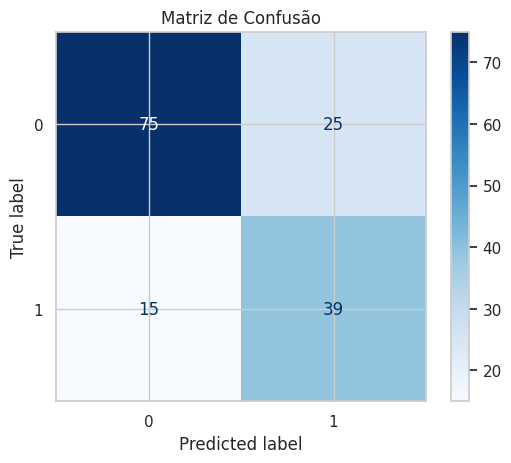

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

x_train, x_test, y_train, y_test = train_test_split_inner(df_treated, True)

sgd_log_result = next((e for e in results if e.name == "SGD-Log"), None)

modelo = sgd_log_result.classifier

# Previs√µes do modelo
y_pred =modelo.predict(x_test)

# Matriz de confus√£o
cm = confusion_matrix(y_test, y_pred)

# Exibir
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=modelo.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confus√£o")
plt.show()

- **75 Verdadeiros Negativos (TN)**: o modelo previu n√£o diabetes (0) corretamente.
- **25 Falsos Positivos (FP)**: o modelo disse que tinha diabetes (1), mas na verdade n√£o tinha. Idealmente dever√≠amos lutar para diminuir esse valor.
- **15 Falsos Negativos (FN)**: o modelo disse que n√£o tinha diabetes (0), mas na verdade tinha.
- **39 Verdadeiros Positivos (VP)**: o modelo previu 1 corretamente.

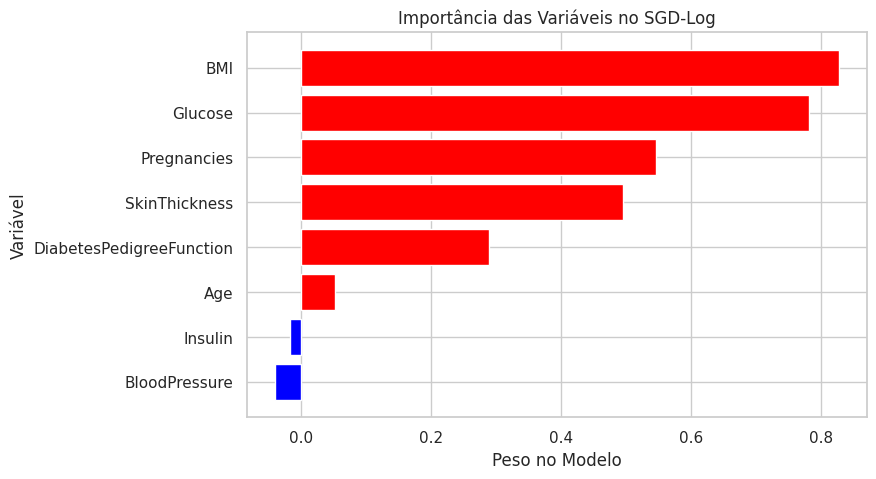

In [53]:
# Coeficientes do modelo (para bin√°rio, modelo.coef_[0])
coef = modelo.coef_[0]

# Monta DataFrame com features e coeficientes
coef_df = pd.DataFrame({
    'Feature': df_treated.drop(columns=["Outcome"]).columns,
    'Coeficiente': coef
}).sort_values(by='Coeficiente', ascending=False)

# Plota
plt.figure(figsize=(8,5))
colors = np.where(coef_df['Coeficiente'] > 0, 'red', 'blue')
plt.barh(coef_df['Feature'], coef_df['Coeficiente'], color=colors)
plt.xlabel('Peso no Modelo')
plt.ylabel('Vari√°vel')
plt.title('Import√¢ncia das Vari√°veis no SGD-Log')
plt.gca().invert_yaxis()
plt.show()

## 9.3 [TODO] Melhorando as configura√ß√µes do modelo escolhido

# Ap√™ndice 01: testando se o tratamento faz diferen√ßa

Nos resultados a seguir notaremos a import√¢ncia de tratar e escalonar nossos dados.

Note que quanto menos tratado, mais inconsist√™nte os resultados s√£o, alcan√ßando n√∫meros absurdos tanto para mais, quanto para menos. E mesmo conforme os dados v√£o ficando mais consist√™ntes, nenhum chega no n√≠vel de homogeniedade obtido no resultado principal.

Note tamb√©m diversos avisos (*warnings*) que s√£o lan√ßados pelos pr√≥prios classificadores avisando que os dados n√£o est√£o do jeito que eles esperam.

## A01. Sem nenhum tratamento, sem o `StandardScaler`.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split_inner(df, False)
results = train_models(x_train, x_test, y_train, y_test)
plot_results_summary(results)

## A02. Sem nenhum tratamento, com o `StandardScaler`.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split_inner(df, True)
results = train_models(x_train, x_test, y_train, y_test)
plot_results_summary(results)

## A03. Apenas com os zeros tratados, sem tratar *outliers*, sem `StandardScaler`

In [ ]:
x_train, x_test, y_train, y_test = train_test_split_inner(df_treated_with_outliers, False)
results = train_models(x_train, x_test, y_train, y_test)
plot_results_summary(results)

## A04. Apenas com os zeros tratados, sem tratar *outliers*, com `StandardScaler`

In [ ]:
x_train, x_test, y_train, y_test = train_test_split_inner(df_treated_with_outliers, True)
results = train_models(x_train, x_test, y_train, y_test)
plot_results_summary(results)

## A05. Conjunto de dados tratados, por√©m sem `StandardScaler`

In [ ]:
x_train, x_test, y_train, y_test = train_test_split_inner(df_treated, False)
results = train_models(x_train, x_test, y_train, y_test)
plot_results_summary(results)

# Refer√™ncias
1. EDUARDO. Machine Learning - M√©todos de Classifica√ß√£o Supervisionados. Dispon√≠vel em: <http://www.leg.ufpr.br/~eferreira/CE064/work5.html#fn1>. Acesso em: 7 ago. 2025.
2. https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/discussion/114293
3. HAYASHI, Y.; YUKITA, S. Rule extraction using Recursive-Rule extraction algorithm with J48graft combined with sampling selection techniques for the diagnosis of type 2 diabetes mellitus in the Pima Indian dataset. Informatics in Medicine Unlocked, v. 2, p. 92‚Äì104, 2016.
4. FROST, J. Linear Regression Explained with Examples. Dispon√≠vel em: <https://statisticsbyjim.com/regression/linear-regression>. Acesso em: 7 ago. 2025.
5. Dua, D. & Graff, C. (2019). UCI Machine Learning Repository: Pima Indians Diabetes Database. University of California, Irvine. Dispon√≠vel em: https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes